In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 한글 필요 라이브러리 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (7,500 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126319 files and dire

In [ ]:
# 한글 폰트 불러오기
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

#### 데이터 분석

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/포트폴리오/2025 KOSSDA 공모전/해치웠나.csv')

df.head()

,Unnamed: 0_df1,orghid98,orghid09,orghid18,hhid26_df1,sample18_x,h260141,h260150,h260221,h260222,...,j503,version,hhid26_df2,j642,신코드,mapping,tag,avg_이직확률,top_TFIDF_키워드,top_이직_원인_후보
0,11,1,1,7258,1,2,8,2,101,86152,...,12,26,2623,1,1,백화점·유통·도소매,백화점·유통·도소매,0.420975,"['영업', '온라인', '브랜드', '연봉', '직무', '업무', '관리', '...","['경력', '업무', '연봉', '근무', '기업', '지원', '관리', '직무..."
1,12,1,1,7258,1,2,8,2,101,86152,...,12,26,2978,1,1,백화점·유통·도소매,백화점·유통·도소매,0.420975,"['영업', '온라인', '브랜드', '연봉', '직무', '업무', '관리', '...","['경력', '업무', '연봉', '근무', '기업', '지원', '관리', '직무..."
2,13,1,1,7258,1,2,8,2,101,86152,...,12,26,2978,1,1,백화점·유통·도소매,백화점·유통·도소매,0.420975,"['영업', '온라인', '브랜드', '연봉', '직무', '업무', '관리', '...","['경력', '업무', '연봉', '근무', '기업', '지원', '관리', '직무..."
3,14,1,1,7258,1,2,8,2,101,86152,...,12,26,2978,1,1,백화점·유통·도소매,백화점·유통·도소매,0.420975,"['영업', '온라인', '브랜드', '연봉', '직무', '업무', '관리', '...","['경력', '업무', '연봉', '근무', '기업', '지원', '관리', '직무..."
4,15,1,1,7258,1,2,8,2,101,86152,...,12,26,2978,1,1,백화점·유통·도소매,백화점·유통·도소매,0.420975,"['영업', '온라인', '브랜드', '연봉', '직무', '업무', '관리', '...","['경력', '업무', '연봉', '근무', '기업', '지원', '관리', '직무..."


In [ ]:
import pandas as pd

# jobnum_y의 앞 두 자리와 마지막 자리 숫자 추출
df['job_group'] = df['jobnum_y'].astype(str).str.extract(r'^(\d{2})')
df['job_detail'] = df['jobnum_y'].astype(str).str.extract(r'(\d)$')

# pid별로 이직 여부와 이직 횟수 계산 (두 조건 모두 반영)
def compute_transfer(group):
    # job_group + job_detail 기준으로 유니크한 조합 수 확인
    unique_jobs = group[['job_group', 'job_detail']].drop_duplicates()
    group['transfer'] = 1 if len(unique_jobs) > 1 else 0
    group['transfer_count'] = len(unique_jobs) - 1
    return group

df = df.groupby('pid', group_keys=False).apply(compute_transfer)

# 중간 컬럼 제거
df = df.drop(columns=['job_group', 'job_detail'])

# 결과 확인
df[['transfer', 'transfer_count']].head(30)

/tmp/ipython-input-4-3653288591.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('pid', group_keys=False).apply(compute_transfer)


,transfer,transfer_count
0,1,13
1,1,13
2,1,13
3,1,13
4,1,13
5,1,13
6,1,13
7,1,13
8,1,13
9,1,13


In [ ]:
df['transfer_count'].value_counts()

,count
transfer_count,
5,9593
6,8536
14,7580
7,7456
8,6672
4,6548
13,6417
9,5987
15,5974


In [ ]:
df.to_csv("/content/drive/MyDrive/포트폴리오/2025 KOSSDA 공모전/df_해치웠다.csv")

#### j 칼럼 분석

In [ ]:
import re

# j로 시작하는 칼럼 + 고정된 컬럼 리스트
selected_columns = [col for col in df.columns if re.match(r'^j', col)]
selected_columns += ['mapping', 'tag', 'avg_이직확률', 'top_TFIDF_키워드', 'top_이직_원인_후보', 'transfer', 'transfer_count']
selected_columns = list(dict.fromkeys(selected_columns))  # 중복 제거

# 새로운 DataFrame 생성
df_j = df[selected_columns]

df_j.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124793 entries, 0 to 124792
Data columns (total 36 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   jobnum1         124793 non-null  int64  
 1   jobclass_x      124793 non-null  int64  
 2   jobnum_x        124793 non-null  int64  
 3   jobtype_x       124793 non-null  int64  
 4   jobwave         124793 non-null  int64  
 5   jobnum_y        124793 non-null  int64  
 6   jobnumc         124793 non-null  int64  
 7   jobcens         124793 non-null  int64  
 8   jobtype_y       124793 non-null  int64  
 9   jobclass_y      124793 non-null  int64  
 10  j652            124793 non-null  int64  
 11  j150            124793 non-null  int64  
 12  j201            124793 non-null  int64  
 13  j202            124793 non-null  int64  
 14  j205            124793 non-null  int64  
 15  j206            124793 non-null  int64  
 16  j301            124793 non-null  int64  
 17  j730           

In [ ]:
df_j['j642']

,j642
0,1
1,1
2,1
3,1
4,1
...,...
124788,47
124789,56
124790,56
124791,56


<ipython-input-45-1301759225>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j['j150_label'] = df_j['j150'].map(j150_labels)


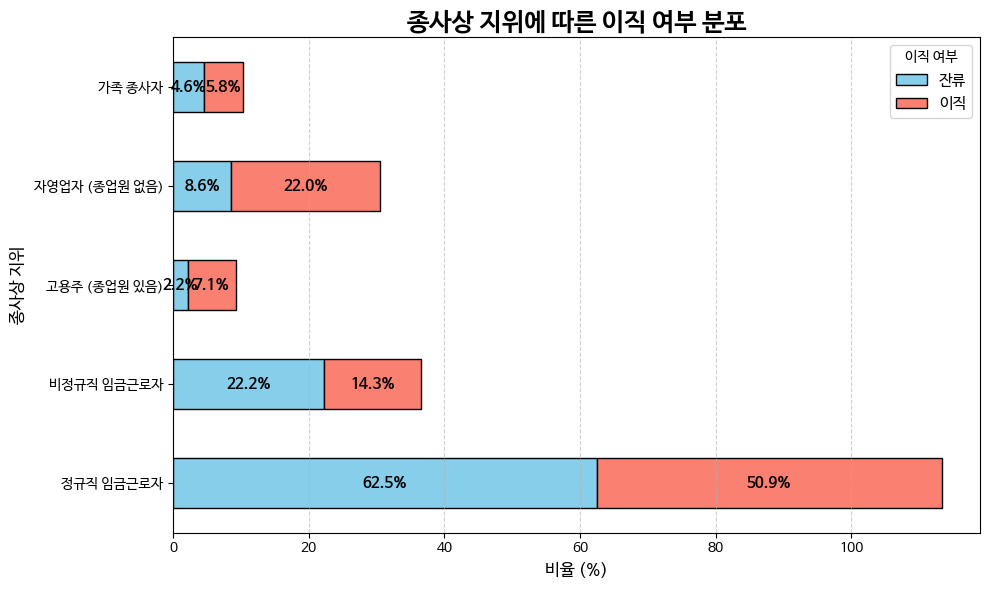

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 종사상 지위 코드 매핑
j150_labels = {
    1: '정규직 임금근로자',
    2: '비정규직 임금근로자',
    3: '고용주 (종업원 있음)',
    4: '자영업자 (종업원 없음)',
    5: '가족 종사자'
}

# j150 라벨링
df_j['j150_label'] = df_j['j150'].map(j150_labels)

# 이직 여부별 비율 계산
j150_counts = pd.crosstab(df_j['j150_label'], df_j['transfer'], normalize='columns') * 100
j150_counts = j150_counts.loc[j150_labels.values()]  # 순서 정렬
j150_counts.columns = ['잔류', '이직']

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
j150_counts.plot(kind='barh', stacked=True, ax=ax,
                 color=['skyblue', 'salmon'], edgecolor='black')

# % 레이블 추가
for i, (index, row) in enumerate(j150_counts.iterrows()):
    ax.text(row['잔류'] / 2, i, f"{row['잔류']:.1f}%", ha='center', va='center', fontsize=11, weight='bold')
    ax.text(row['잔류'] + row['이직'] / 2, i, f"{row['이직']:.1f}%", ha='center', va='center', fontsize=11, weight='bold')

# 제목 및 스타일
plt.title('종사상 지위에 따른 이직 여부 분포', fontsize=18, weight='bold')
plt.xlabel('비율 (%)', fontsize=12)
plt.ylabel('종사상 지위', fontsize=12)
plt.legend(title='이직 여부', fontsize=11)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

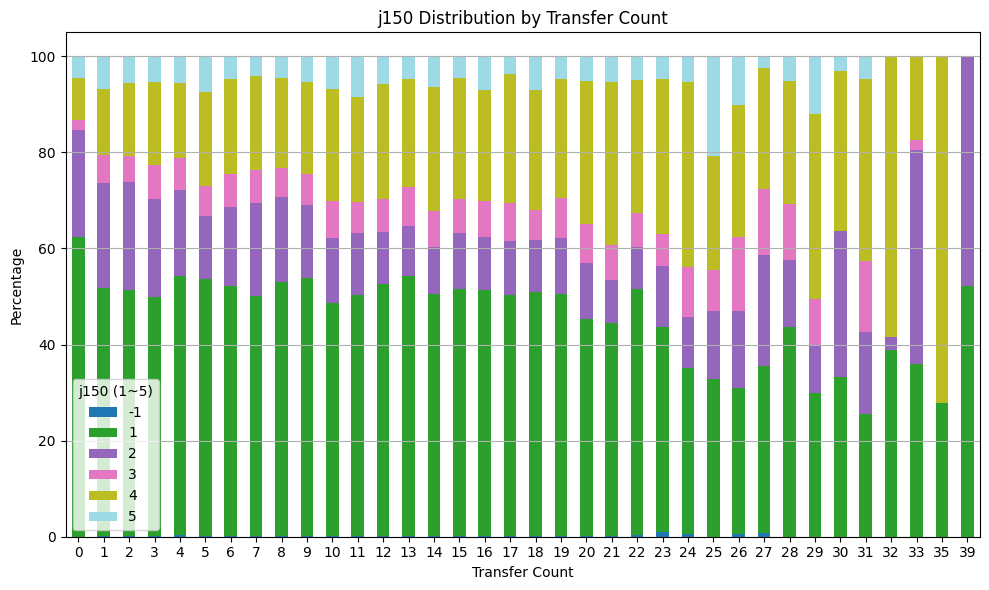

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transfer_count별 j150 분포 비율 계산
j150_by_count = pd.crosstab(df_j['j150'], df_j['transfer_count'], normalize='columns') * 100

# 시각화
j150_by_count.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='tab20')
plt.title('j150 Distribution by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Percentage')
plt.legend(title='j150 (1~5)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<ipython-input-38-3849824432>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j['j201_label'] = df_j['j201'].map(j201_labels)


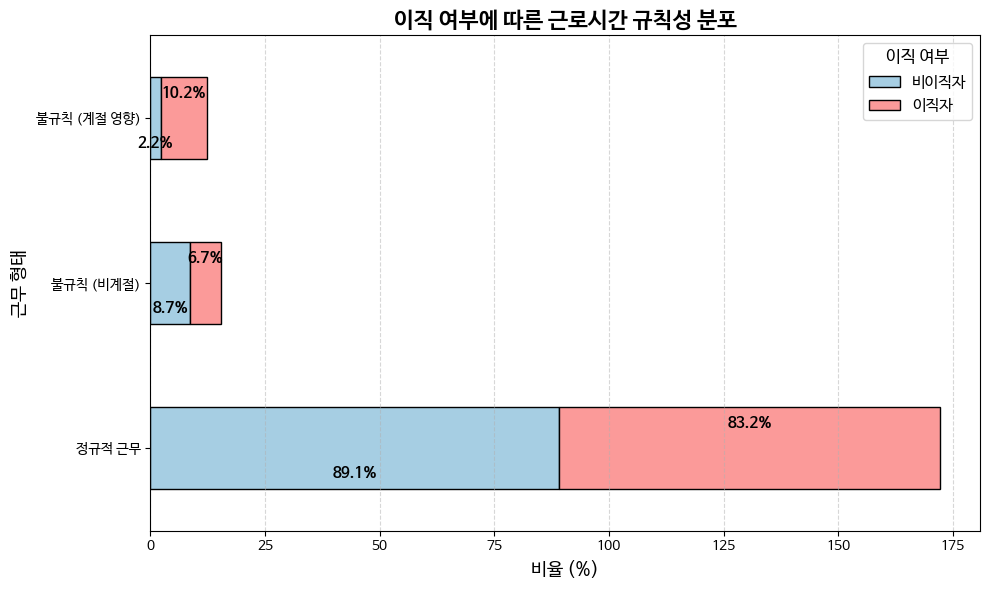

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# j201 라벨 매핑
j201_labels = {
    1: '정규적 근무',
    2: '불규칙 (비계절)',
    3: '불규칙 (계절 영향)'
}
df_j['j201_label'] = df_j['j201'].map(j201_labels)

# 이직 여부에 따른 분포 비율 계산
j201_counts = pd.crosstab(df_j['j201_label'], df_j['transfer'], normalize='columns') * 100
j201_counts = j201_counts.loc[['정규적 근무', '불규칙 (비계절)', '불규칙 (계절 영향)']]  # 순서 고정
j201_counts.columns = ['비이직자', '이직자']

# 시각화
fig, ax = plt.subplots(figsize=(10, 6))
bars = j201_counts.plot(kind='barh', stacked=True, ax=ax, color=['#A6CEE3', '#FB9A99'], edgecolor='black')

# 라벨 위치를 위아래로 살짝 분산시켜서 겹침 방지
for i, (index, row) in enumerate(j201_counts.iterrows()):
    # 비이직자 레이블: 약간 위로
    ax.text(row['비이직자'] / 2, i - 0.15, f"{row['비이직자']:.1f}%", va='center', ha='center',
            fontsize=11, color='black', weight='bold')
    # 이직자 레이블: 약간 아래로
    ax.text(row['비이직자'] + row['이직자'] / 2, i + 0.15, f"{row['이직자']:.1f}%", va='center', ha='center',
            fontsize=11, color='black', weight='bold')

# 제목과 축 설정
plt.title('이직 여부에 따른 근로시간 규칙성 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)', fontsize=13)
plt.ylabel('근무 형태', fontsize=13)
plt.legend(title='이직 여부', fontsize=11, title_fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

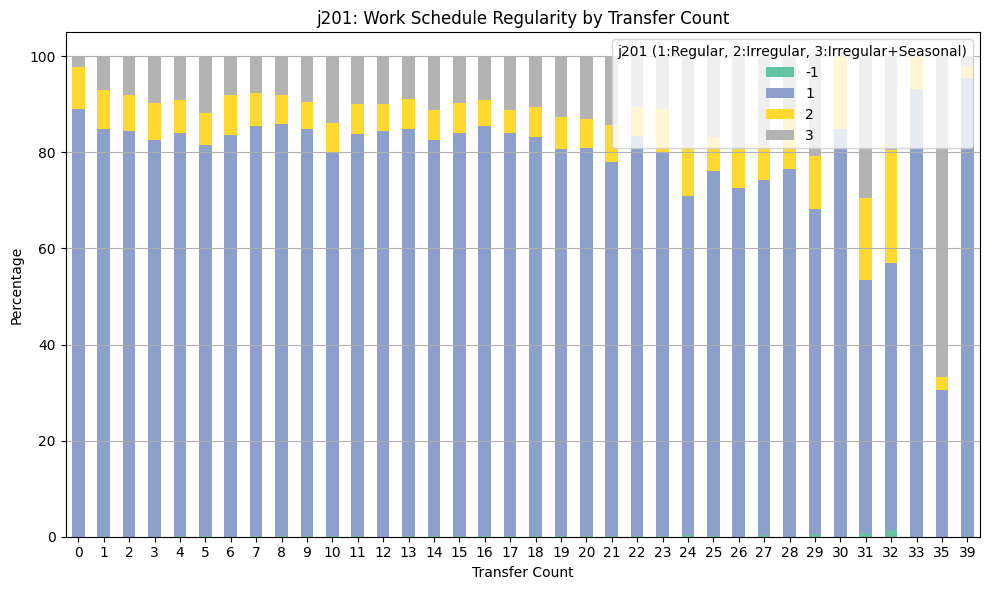

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transfer_count별 j201 분포 비율 계산
j201_by_count = pd.crosstab(df_j['j201'], df_j['transfer_count'], normalize='columns') * 100

# 시각화
j201_by_count.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title('j201: Work Schedule Regularity by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Percentage')
plt.legend(title='j201 (1:Regular, 2:Irregular, 3:Irregular+Seasonal)', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<ipython-input-44-940894500>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j['j202_label'] = df_j['j202'].map(j202_labels)


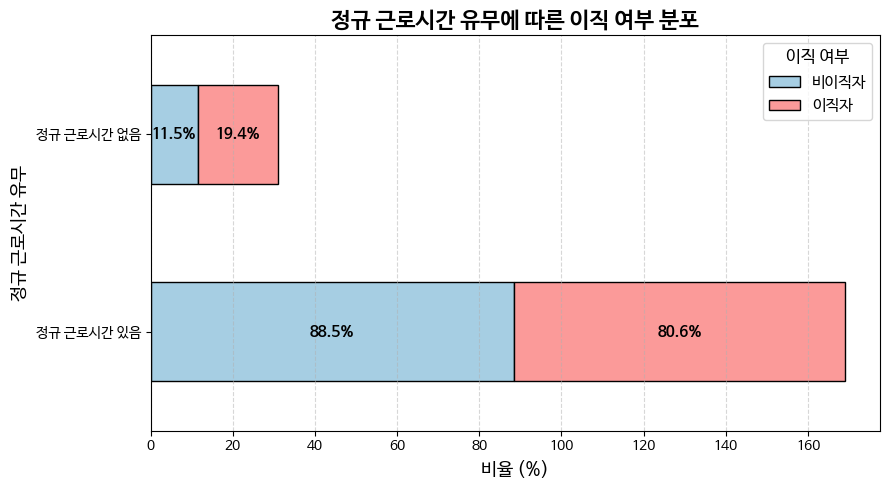

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# j202 코드 매핑
j202_labels = {
    1: '정규 근로시간 있음',
    2: '정규 근로시간 없음'
}
df_j['j202_label'] = df_j['j202'].map(j202_labels)

# 이직 여부에 따른 분포 비율 계산
j202_counts = pd.crosstab(df_j['j202_label'], df_j['transfer'], normalize='columns') * 100
j202_counts = j202_counts.loc[['정규 근로시간 있음', '정규 근로시간 없음']]  # 순서 고정
j202_counts.columns = ['비이직자', '이직자']

# 시각화
fig, ax = plt.subplots(figsize=(9, 5))
j202_counts.plot(kind='barh', stacked=True, ax=ax, color=['#A6CEE3', '#FB9A99'], edgecolor='black')

# 각 막대 내부에 텍스트 레이블 추가 (한 줄로)
for i, (index, row) in enumerate(j202_counts.iterrows()):
    ax.text(row['비이직자'] / 2, i, f"{row['비이직자']:.1f}%", va='center', ha='center', fontsize=11, color='black', weight='bold')
    ax.text(row['비이직자'] + row['이직자'] / 2, i, f"{row['이직자']:.1f}%", va='center', ha='center', fontsize=11, color='black', weight='bold')

# 제목 및 스타일 설정
plt.title('정규 근로시간 유무에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)', fontsize=13)
plt.ylabel('정규 근로시간 유무', fontsize=13)
plt.legend(title='이직 여부', fontsize=11, title_fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

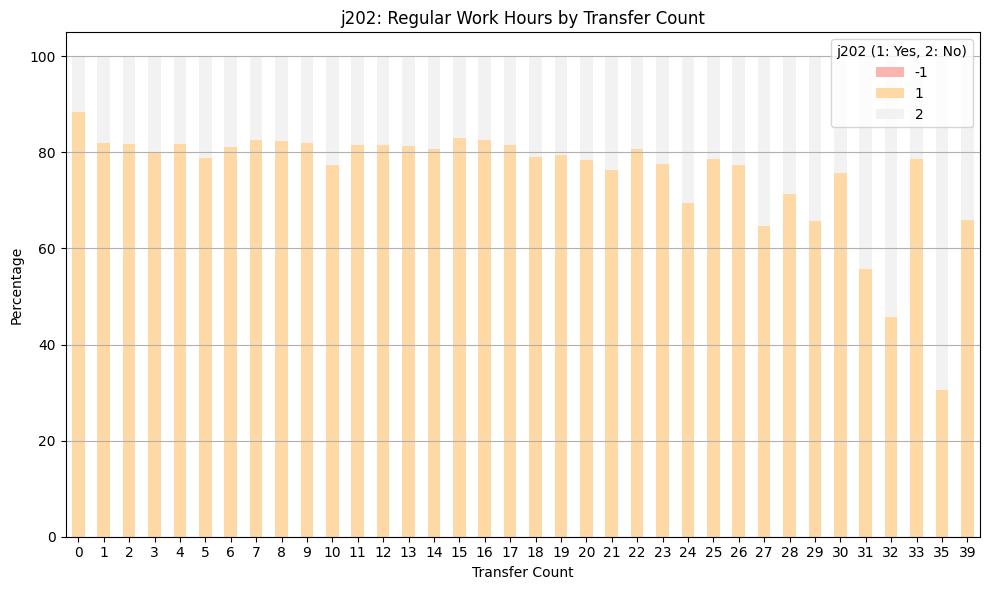

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transfer_count별 j202 분포 비율 계산
j202_by_count = pd.crosstab(df_j['j202'], df_j['transfer_count'], normalize='columns') * 100

# 시각화
j202_by_count.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Pastel1')
plt.title('j202: Regular Work Hours by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Percentage')
plt.legend(title='j202 (1: Yes, 2: No)', loc='upper right')
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y')
plt.show()

<ipython-input-24-430355019>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


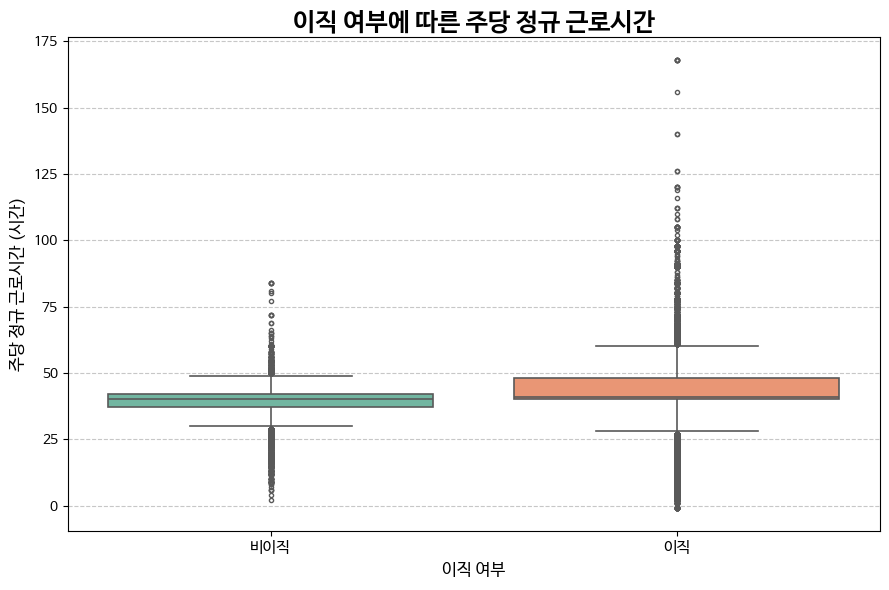

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
sns.boxplot(
    x='transfer',
    y='j205',
    data=df_j,
    palette='Set2',
    linewidth=1.2,
    fliersize=3  # 이상치 점 크기 조절
)

plt.title('이직 여부에 따른 주당 정규 근로시간', fontsize=18, weight='bold')
plt.xlabel('이직 여부', fontsize=12)
plt.ylabel('주당 정규 근로시간 (시간)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks([0, 1], ['비이직', '이직'], fontsize=11)
plt.tight_layout()
plt.show()

<ipython-input-64-72f607bdd9d5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer_count', y='j205', data=df_j, palette='Set3')


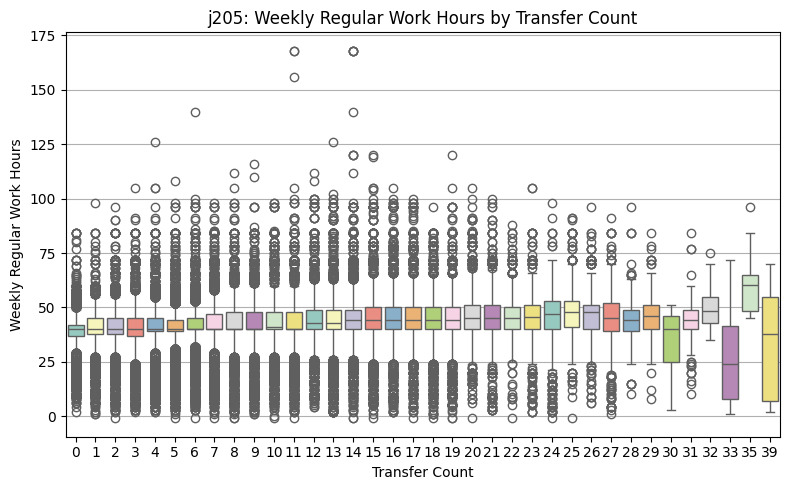

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot으로 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer_count', y='j205', data=df_j, palette='Set3')
plt.title('j205: Weekly Regular Work Hours by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Weekly Regular Work Hours')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-48-aaae7e3b4a15>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j206', data=df_j, palette='Set3')


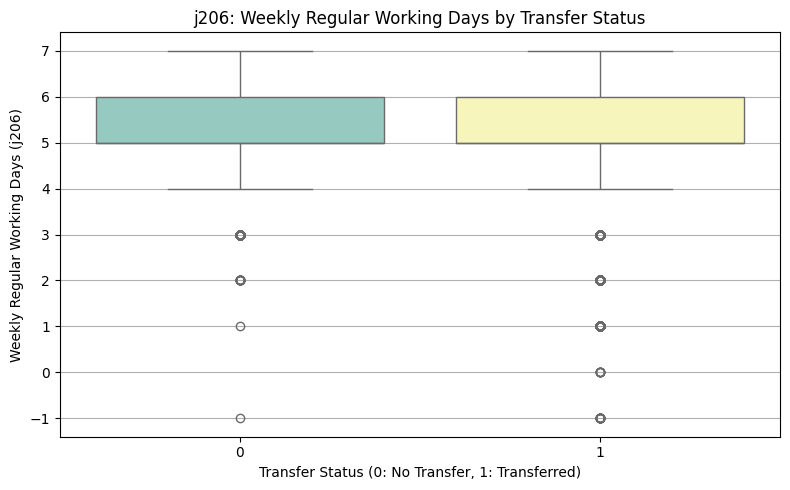

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: 주당 정규근로일수 분포 비교
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j206', data=df_j, palette='Set3')
plt.title('j206: Weekly Regular Working Days by Transfer Status')
plt.xlabel('Transfer Status (0: No Transfer, 1: Transferred)')
plt.ylabel('Weekly Regular Working Days (j206)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-65-7a4eb0319a33>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer_count', y='j206', data=df_j, palette='Set3')


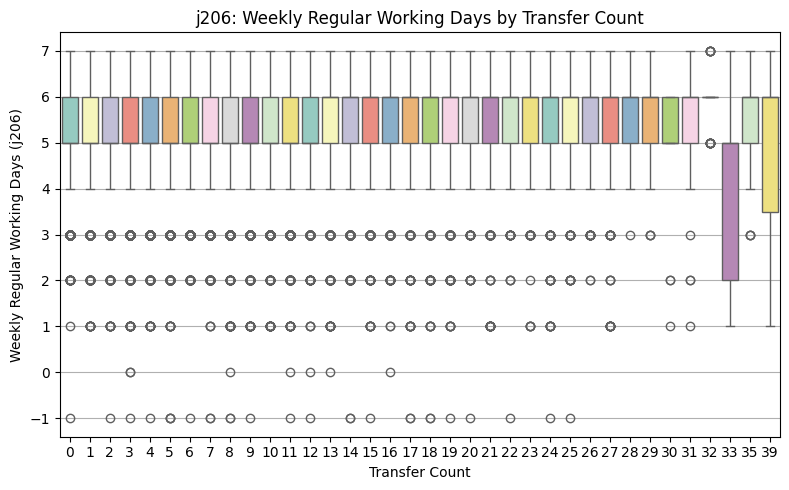

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: 주당 정규근로일수 분포 비교 (이직 횟수 기준)
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer_count', y='j206', data=df_j, palette='Set3')
plt.title('j206: Weekly Regular Working Days by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Weekly Regular Working Days (j206)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

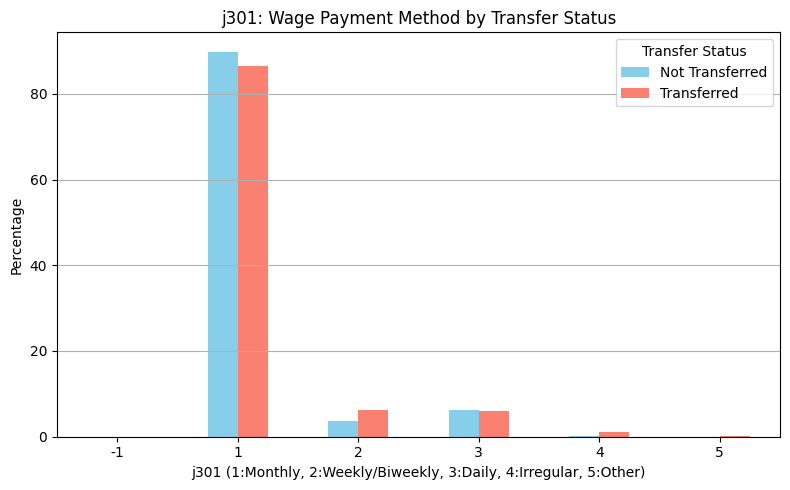

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# transfer 여부에 따른 j301 비율 계산
j301_counts = pd.crosstab(df_j['j301'], df_j['transfer'], normalize='columns') * 100
j301_counts.columns = ['Not Transferred', 'Transferred']

# 시각화
j301_counts.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'salmon'])
plt.title('j301: Wage Payment Method by Transfer Status')
plt.xlabel('j301 (1:Monthly, 2:Weekly/Biweekly, 3:Daily, 4:Irregular, 5:Other)')
plt.ylabel('Percentage')
plt.legend(title='Transfer Status')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-25-485801142>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j['j301_label'] = df_j['j301'].map(j301_labels)


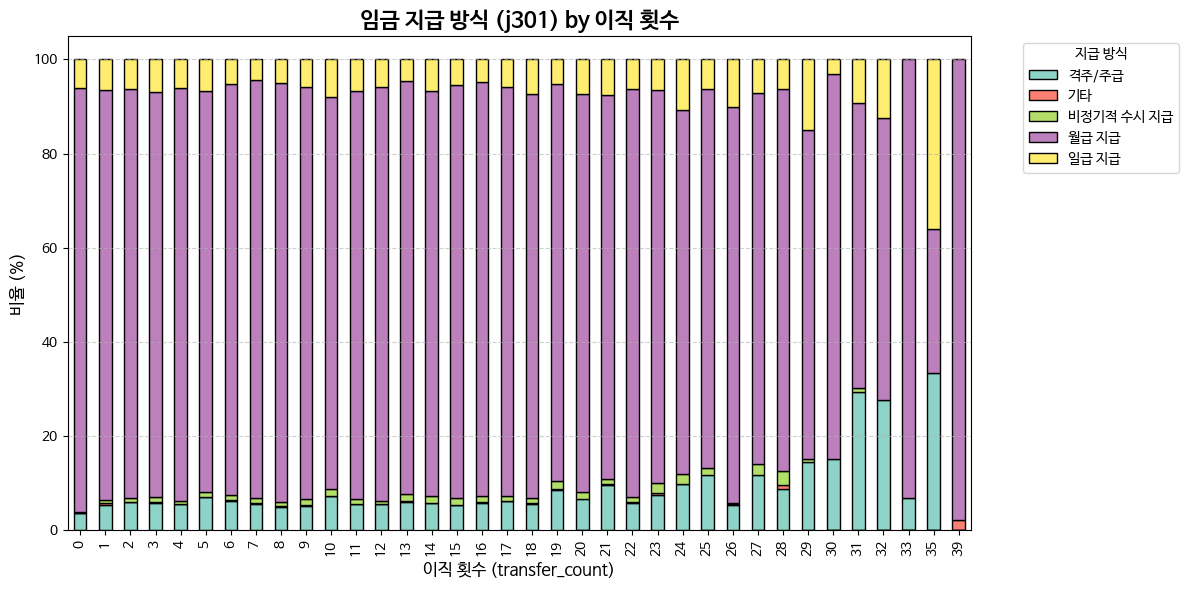

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# j301 라벨 정의
j301_labels = {
    1: '월급 지급',
    2: '격주/주급',
    3: '일급 지급',
    4: '비정기적 수시 지급',
    5: '기타'
}
df_j['j301_label'] = df_j['j301'].map(j301_labels)

# transfer_count 기준 분포 계산
j301_counts = pd.crosstab(df_j['j301_label'], df_j['transfer_count'], normalize='columns') * 100

# 시각화
j301_counts.T.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3', edgecolor='black')

plt.title('임금 지급 방식 (j301) by 이직 횟수', fontsize=16, weight='bold')
plt.xlabel('이직 횟수 (transfer_count)', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(title='지급 방식', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

<ipython-input-50-e0d1f709e25d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j730', data=df_j, palette='coolwarm')


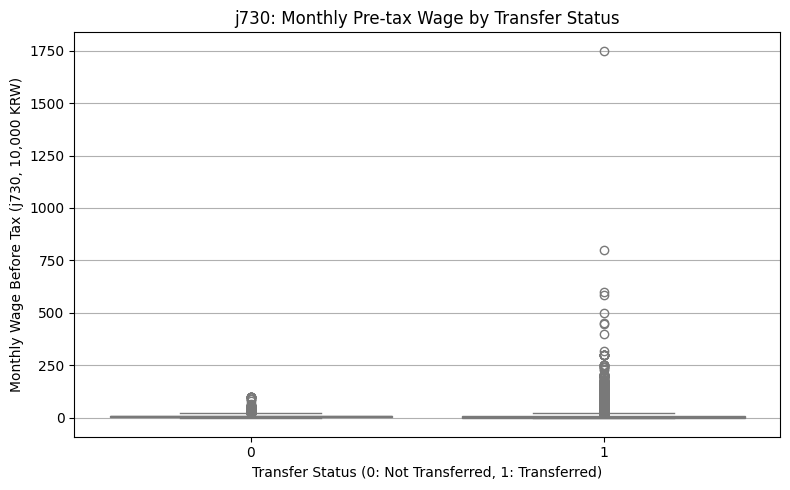

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot으로 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j730', data=df_j, palette='coolwarm')
plt.title('j730: Monthly Pre-tax Wage by Transfer Status')
plt.xlabel('Transfer Status (0: Not Transferred, 1: Transferred)')
plt.ylabel('Monthly Wage Before Tax (j730, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-67-5aedf3caf5c3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer_count', y='j730', data=df_j, palette='coolwarm')


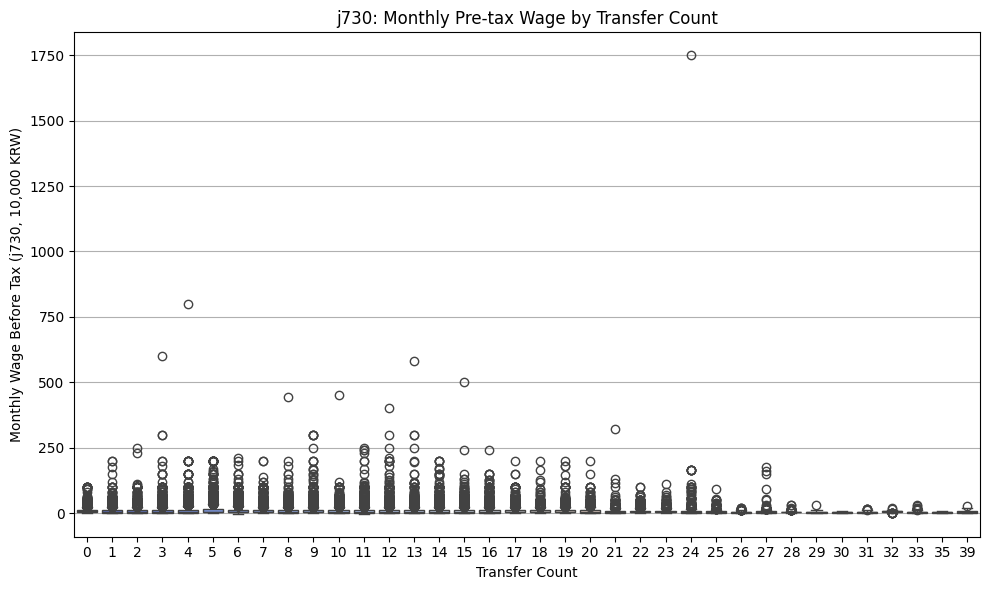

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot: j730 vs transfer_count
plt.figure(figsize=(10, 6))
sns.boxplot(x='transfer_count', y='j730', data=df_j, palette='coolwarm')
plt.title('j730: Monthly Pre-tax Wage by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Monthly Wage Before Tax (j730, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-51-1ab2e9d630e0>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j316', data=df_j, palette='YlGnBu')


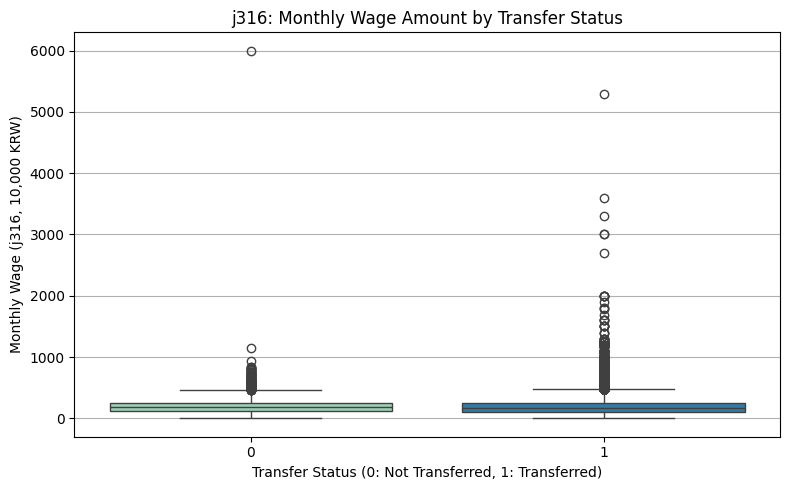

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j316', data=df_j, palette='YlGnBu')
plt.title('j316: Monthly Wage Amount by Transfer Status')
plt.xlabel('Transfer Status (0: Not Transferred, 1: Transferred)')
plt.ylabel('Monthly Wage (j316, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-27-2474948767>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j['j316_log'] = np.log1p(df_j['j316'])  # log1p = log(1 + x)
<ipython-input-27-2474948767>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


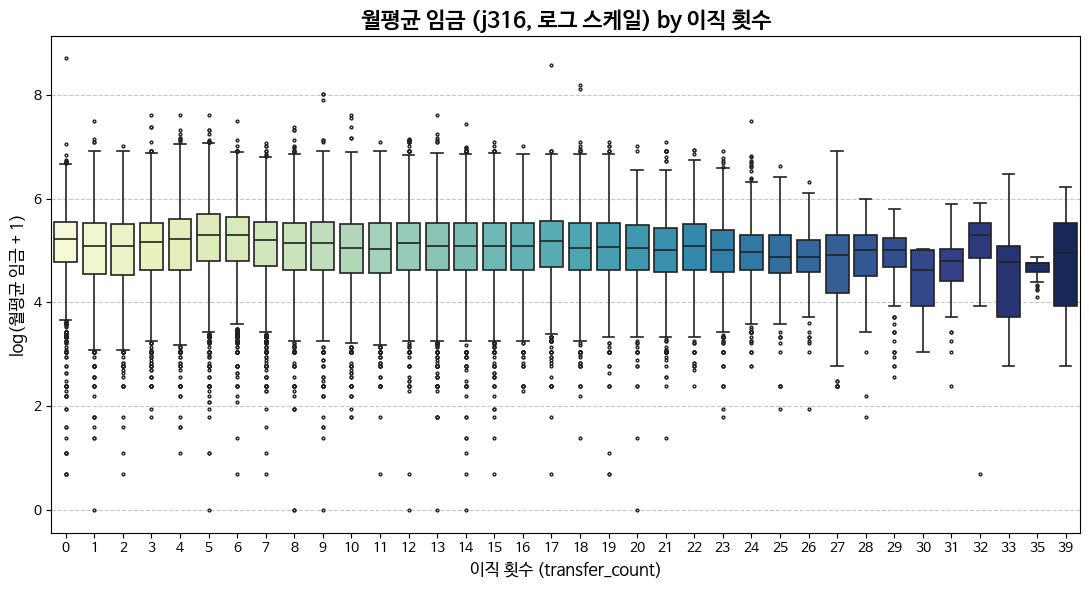

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 0인 값은 로그 변환이 안되므로, 최소값 1 이상으로 보정
df_j['j316_log'] = np.log1p(df_j['j316'])  # log1p = log(1 + x)

plt.figure(figsize=(11, 6))
sns.boxplot(
    x='transfer_count',
    y='j316_log',
    data=df_j,
    palette='YlGnBu',
    linewidth=1.2,
    fliersize=2
)

plt.title('월평균 임금 (j316, 로그 스케일) by 이직 횟수', fontsize=16, weight='bold')
plt.xlabel('이직 횟수 (transfer_count)', fontsize=12)
plt.ylabel('log(월평균 임금 + 1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-52-9bbabd314073>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j318', data=df_j, palette='coolwarm')


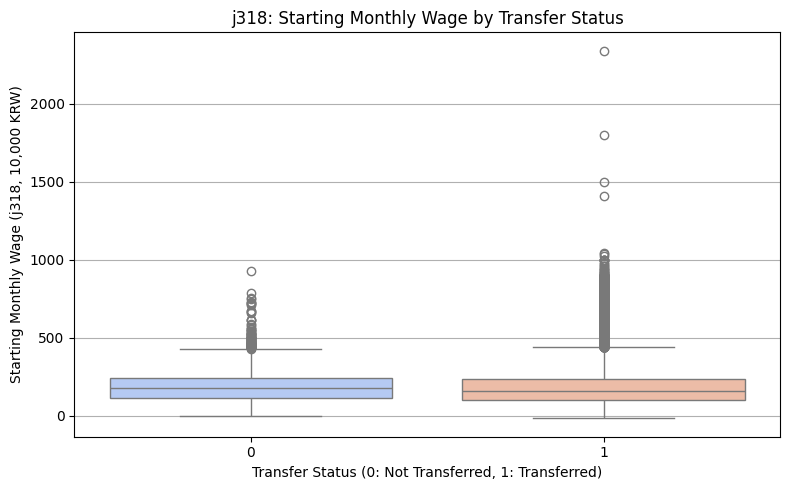

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j318', data=df_j, palette='coolwarm')
plt.title('j318: Starting Monthly Wage by Transfer Status')
plt.xlabel('Transfer Status (0: Not Transferred, 1: Transferred)')
plt.ylabel('Starting Monthly Wage (j318, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-28-3323406162>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_j['j318_log'] = np.log1p(df_j['j318'])  # log(1 + x)
<ipython-input-28-3323406162>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


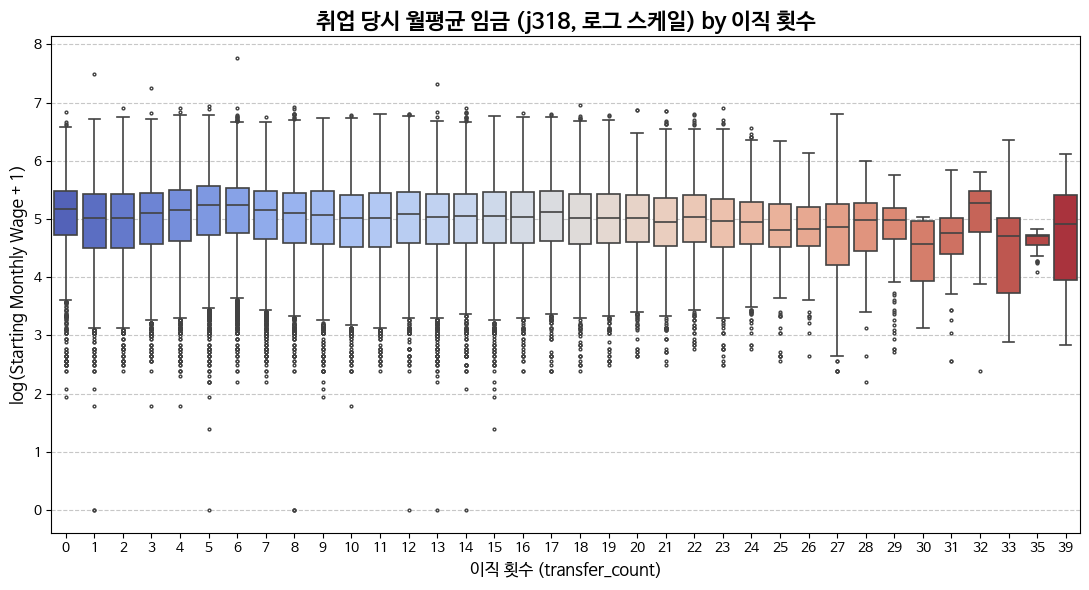

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 로그 변환 (0 이상으로 처리)
df_j['j318_log'] = np.log1p(df_j['j318'])  # log(1 + x)

# 시각화
plt.figure(figsize=(11, 6))
sns.boxplot(
    x='transfer_count',
    y='j318_log',
    data=df_j,
    palette='coolwarm',
    linewidth=1.2,
    fliersize=2
)

plt.title('취업 당시 월평균 임금 (j318, 로그 스케일) by 이직 횟수', fontsize=16, weight='bold')
plt.xlabel('이직 횟수 (transfer_count)', fontsize=12)
plt.ylabel('log(Starting Monthly Wage + 1)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

<ipython-input-53-e157fc1d129d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j322', data=df_j, palette='RdPu')


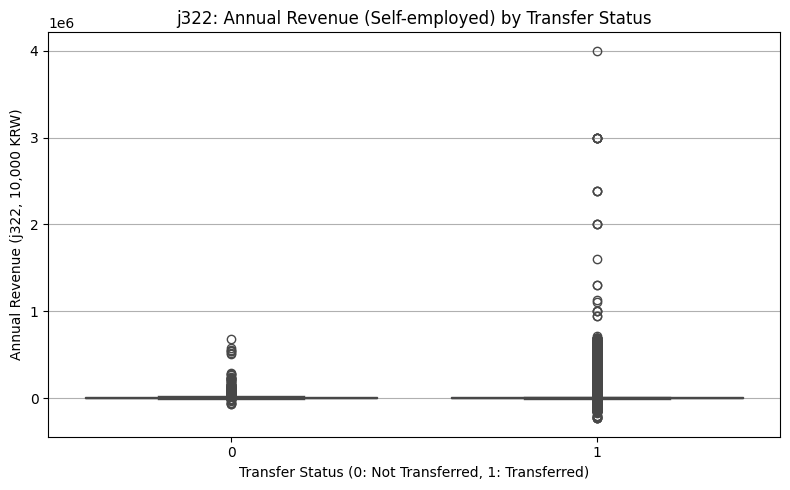

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j322', data=df_j, palette='RdPu')
plt.title('j322: Annual Revenue (Self-employed) by Transfer Status')
plt.xlabel('Transfer Status (0: Not Transferred, 1: Transferred)')
plt.ylabel('Annual Revenue (j322, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-71-f74f005f2917>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer_count', y='j322', data=df_j, palette='RdPu')


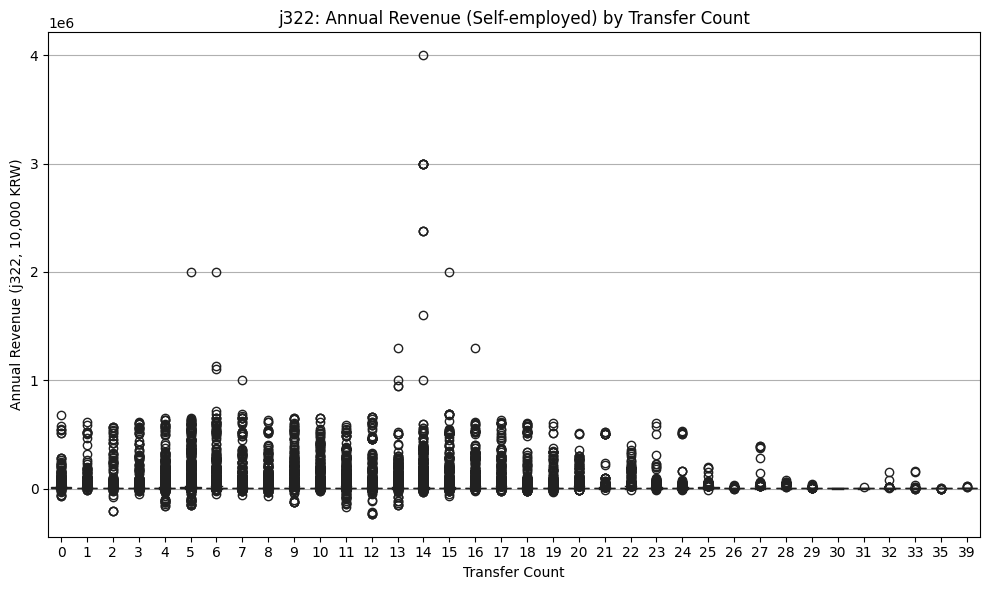

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='transfer_count', y='j322', data=df_j, palette='RdPu')
plt.title('j322: Annual Revenue (Self-employed) by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Annual Revenue (j322, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-54-ea90c33b71ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j325', data=df_j, palette='BuGn')


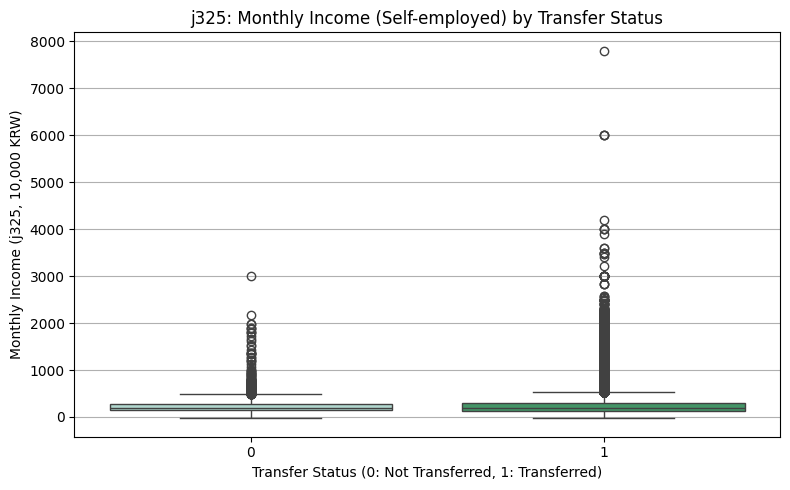

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j325', data=df_j, palette='BuGn')
plt.title('j325: Monthly Income (Self-employed) by Transfer Status')
plt.xlabel('Transfer Status (0: Not Transferred, 1: Transferred)')
plt.ylabel('Monthly Income (j325, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-72-71a1bb10bdba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer_count', y='j325', data=df_j, palette='BuGn')


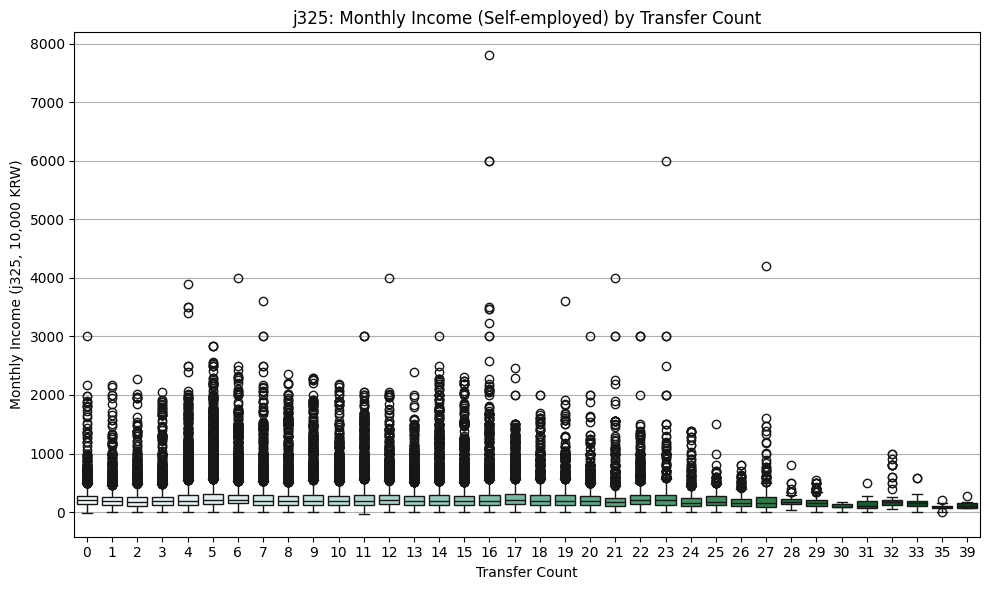

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(x='transfer_count', y='j325', data=df_j, palette='BuGn')
plt.title('j325: Monthly Income (Self-employed) by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Monthly Income (j325, 10,000 KRW)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

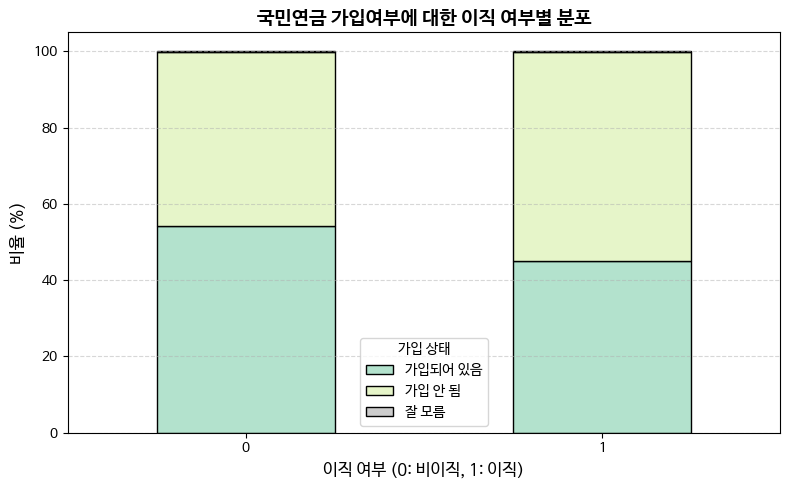

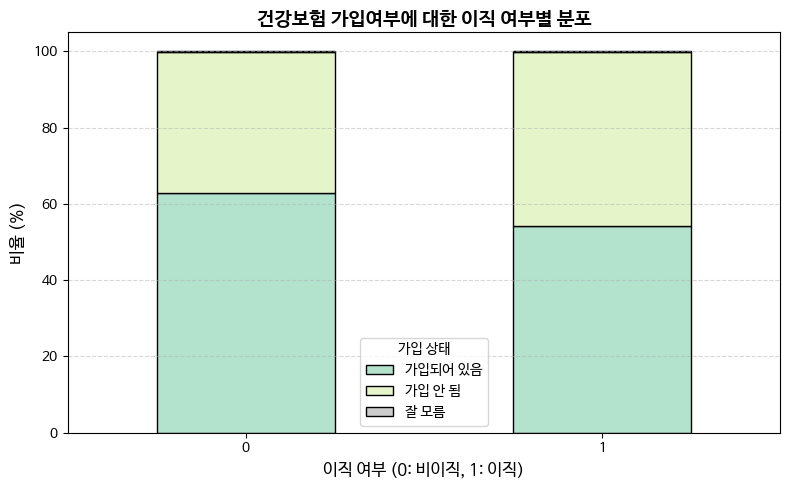

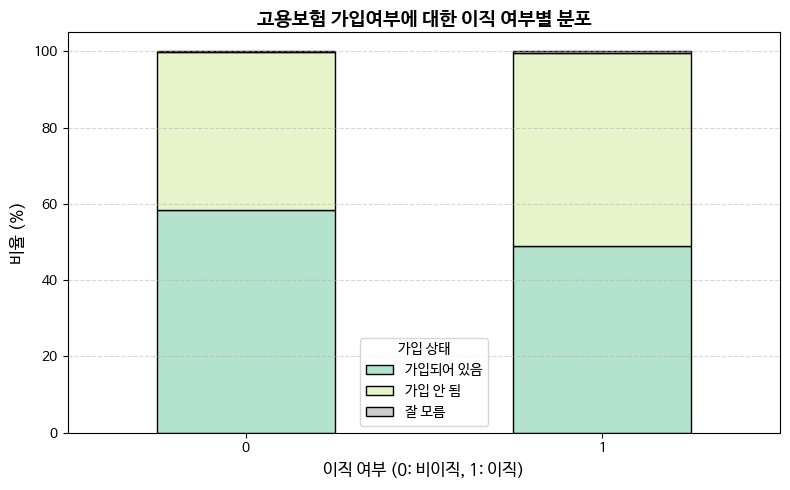

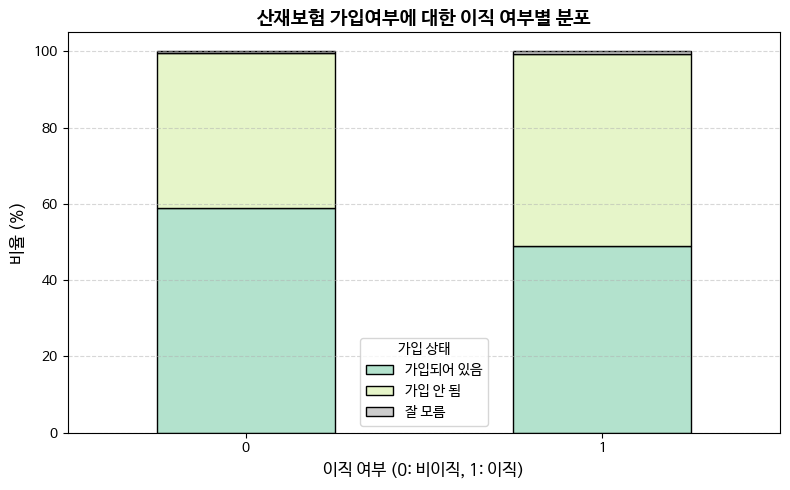

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 보험 변수 및 제목 정의
insurance_vars = {
    'j401': '국민연금 가입여부',
    'j403': '건강보험 가입여부',
    'j404': '고용보험 가입여부',
    'j405': '산재보험 가입여부'
}

# 시각화 반복
for var, title in insurance_vars.items():
    # -1 제거
    temp_df = df_j[df_j[var] != -1]

    # 교차표 생성 및 비율 계산
    counts = pd.crosstab(temp_df[var], temp_df['transfer'], normalize='columns') * 100
    counts = counts.rename(index={
        1: '가입되어 있음',
        2: '가입 안 됨',
        3: '잘 모름'
    })
    counts = counts.T  # transfer가 x축

    # 시각화
    ax = counts.plot(kind='bar', stacked=True, figsize=(8, 5), colormap='Pastel2', edgecolor='black')
    plt.title(f'{title}에 대한 이직 여부별 분포', fontsize=14, weight='bold')
    plt.xlabel('이직 여부 (0: 비이직, 1: 이직)', fontsize=12)
    plt.ylabel('비율 (%)', fontsize=12)
    plt.legend(title='가입 상태', fontsize=10)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

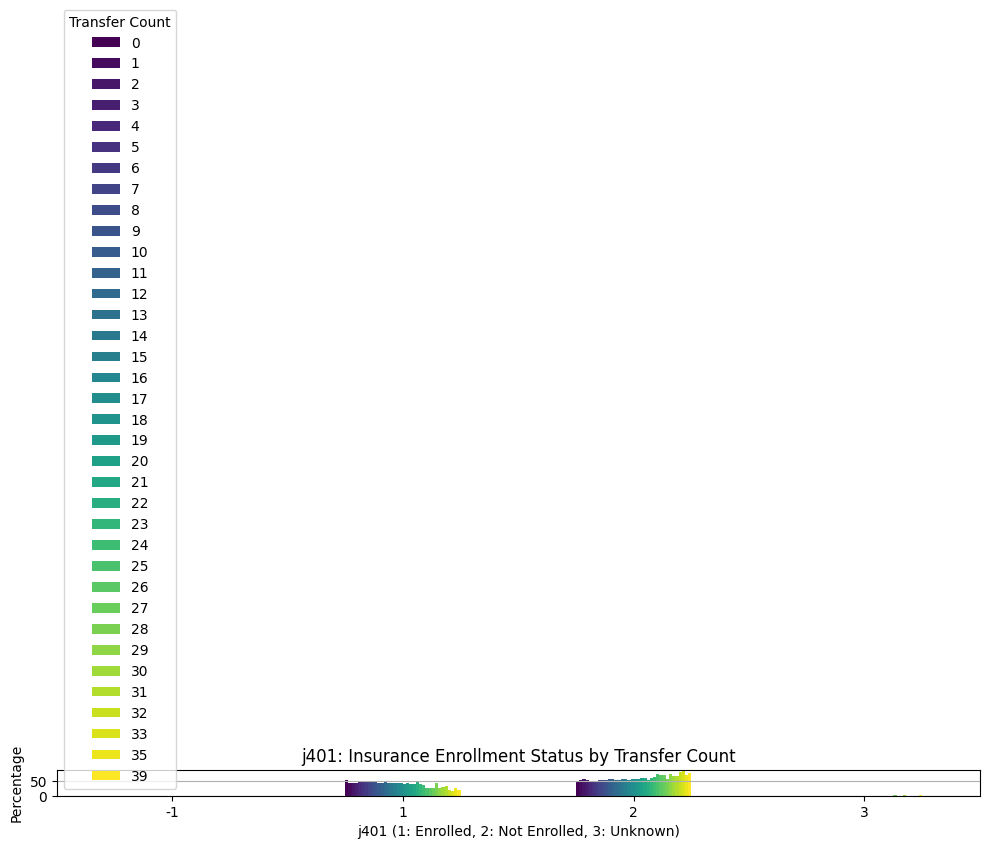

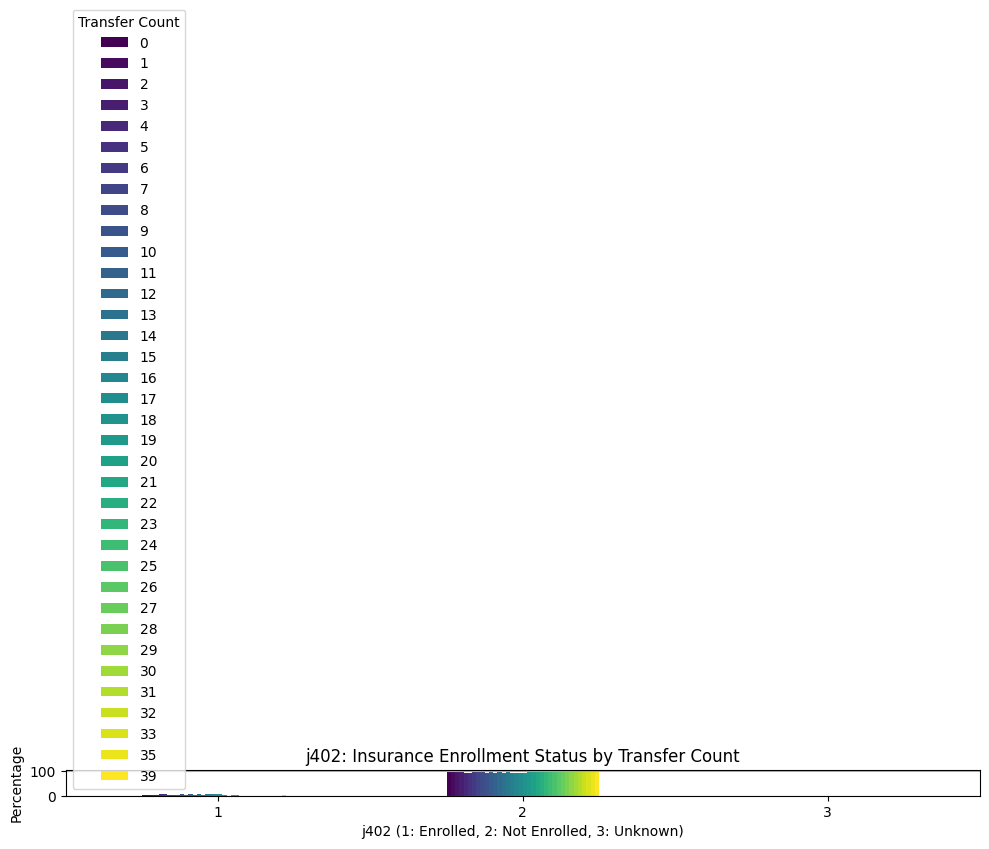

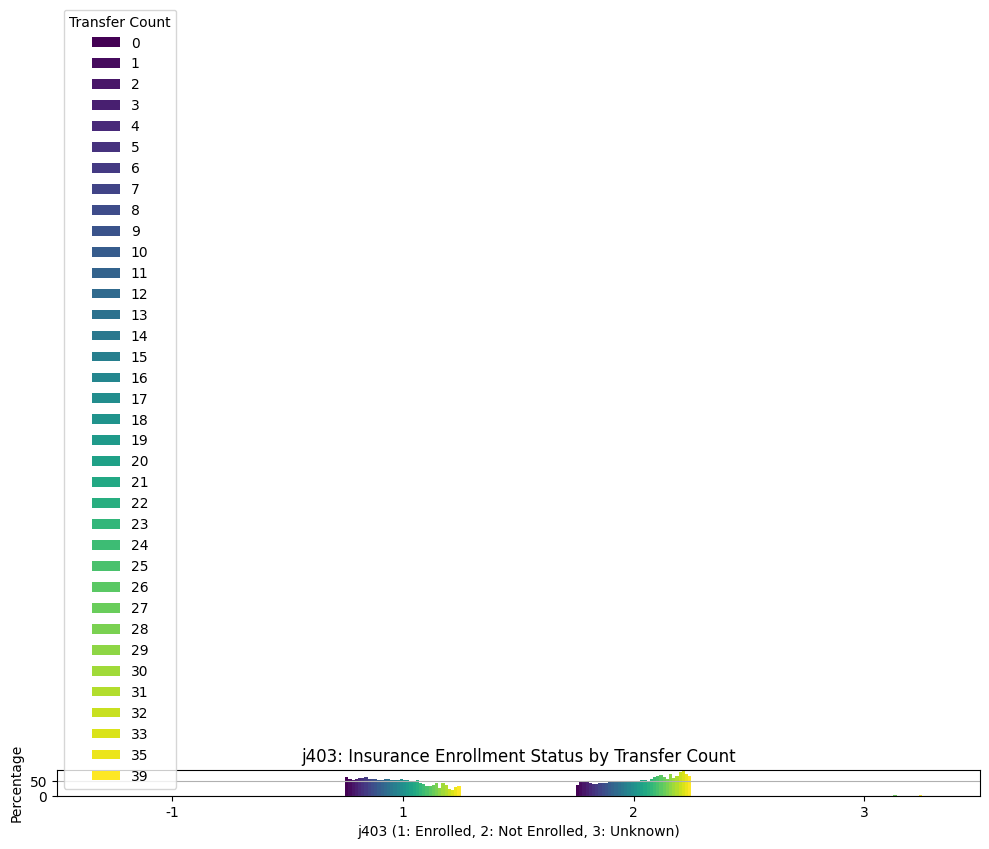

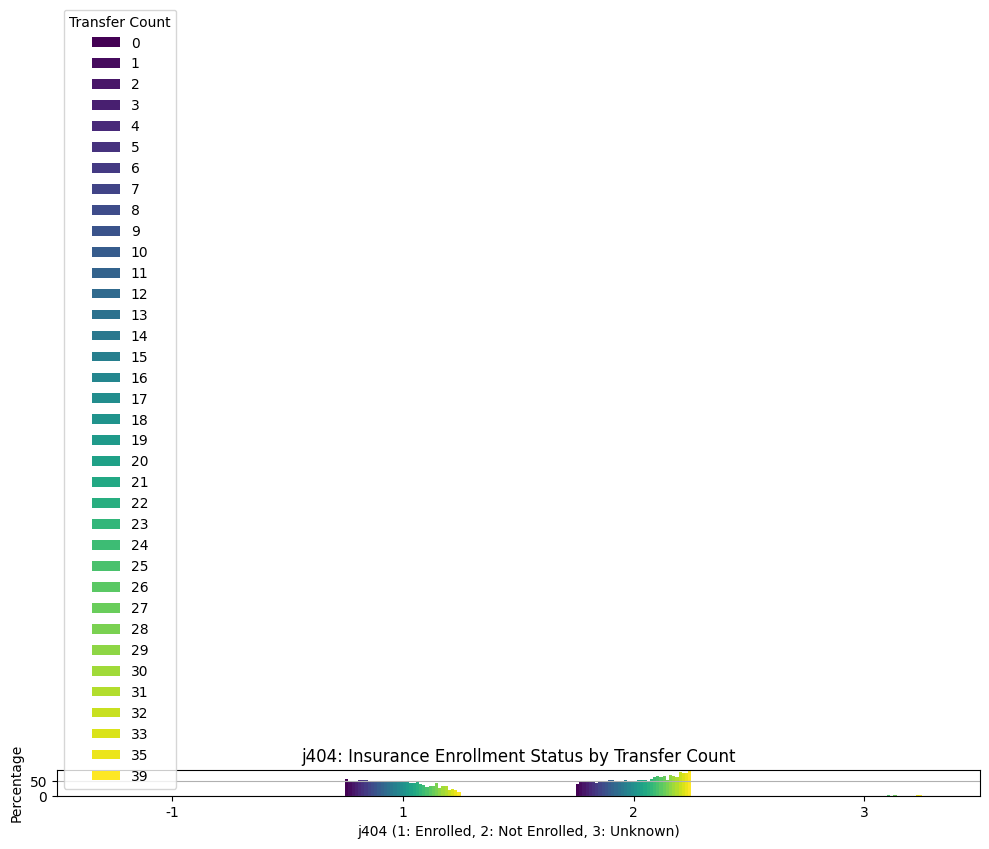

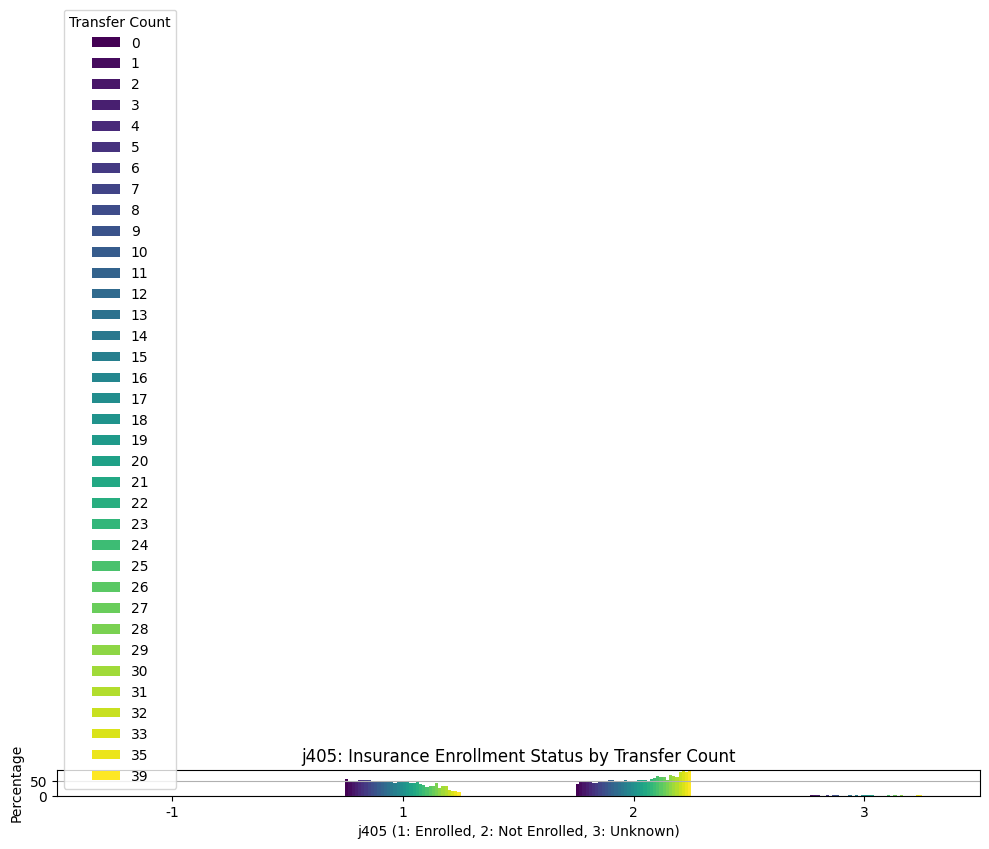

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 보험 가입 여부 관련 변수 목록
insurance_vars = ['j401', 'j402', 'j403', 'j404', 'j405']

# 각각에 대해 transfer_count 기준 시각화 반복
for var in insurance_vars:
    counts = pd.crosstab(df_j[var], df_j['transfer_count'], normalize='columns') * 100

    # 시각화
    counts.plot(kind='bar', figsize=(10, 5), cmap='viridis')
    plt.title(f'{var}: Insurance Enrollment Status by Transfer Count')
    plt.xlabel(f'{var} (1: Enrolled, 2: Not Enrolled, 3: Unknown)')
    plt.ylabel('Percentage')
    plt.legend(title='Transfer Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

<ipython-input-57-fdeffd7f91ac>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer', y='j503', data=df_j, palette='Pastel1')


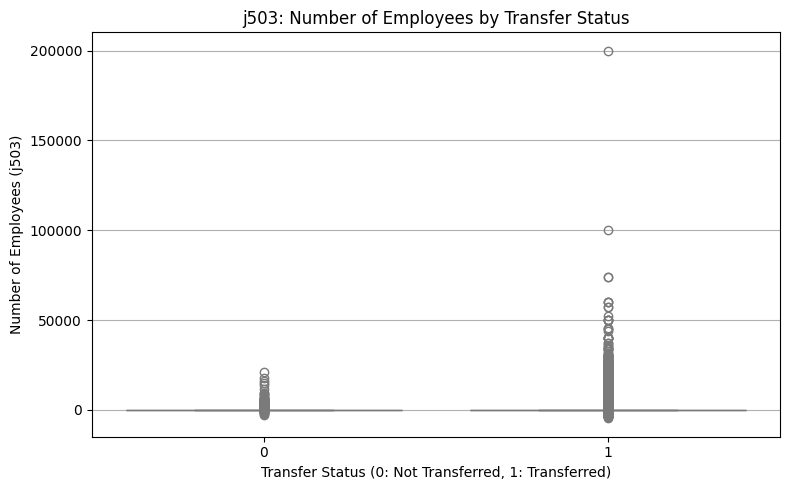

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화
plt.figure(figsize=(8, 5))
sns.boxplot(x='transfer', y='j503', data=df_j, palette='Pastel1')
plt.title('j503: Number of Employees by Transfer Status')
plt.xlabel('Transfer Status (0: Not Transferred, 1: Transferred)')
plt.ylabel('Number of Employees (j503)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-74-25d45065bbdf>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='transfer_count', y='j503', data=df_j, palette='Pastel1')


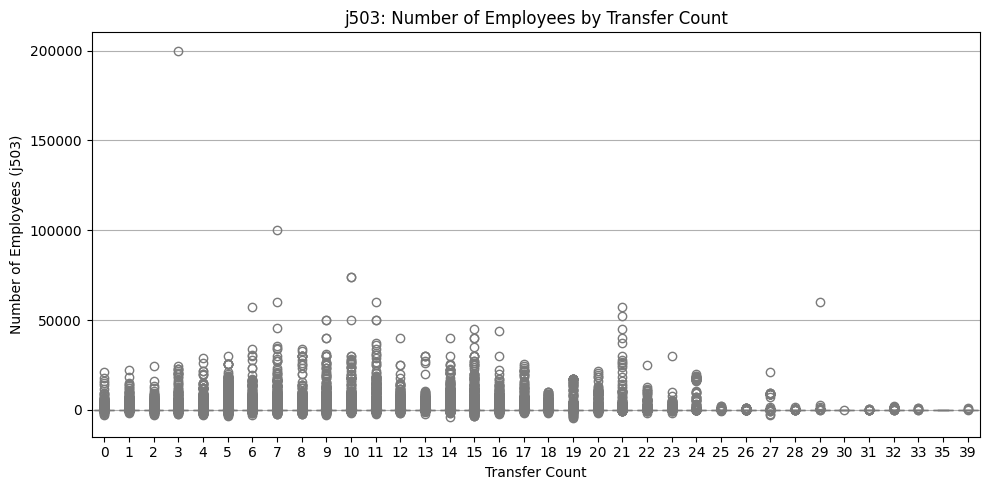

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# boxplot 시각화 (transfer_count 기준)
plt.figure(figsize=(10, 5))
sns.boxplot(x='transfer_count', y='j503', data=df_j, palette='Pastel1')
plt.title('j503: Number of Employees by Transfer Count')
plt.xlabel('Transfer Count')
plt.ylabel('Number of Employees (j503)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 52629 (\N{HANGUL SYLLABLE CUG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 49444 (\N{HANGUL SYLLABLE SEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-58-cc1605fe2a0c>:15: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipyt

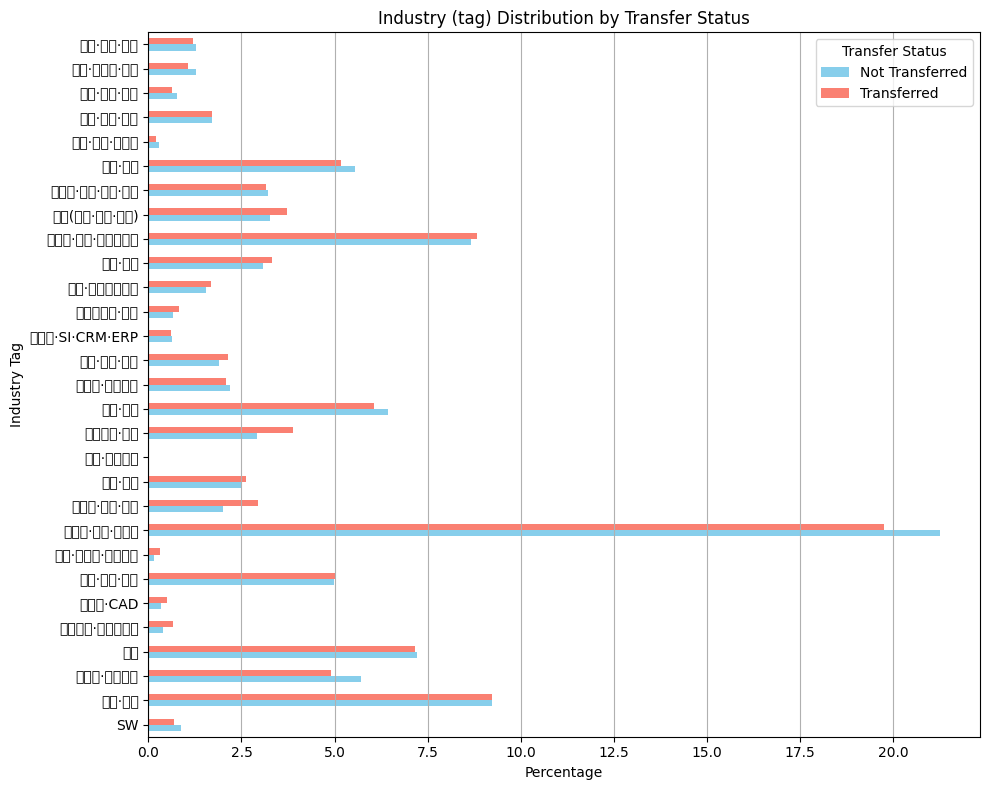

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 산업별 이직 여부 비율 계산
tag_counts = pd.crosstab(df_j['tag'], df_j['transfer'], normalize='columns') * 100
tag_counts.columns = ['Not Transferred', 'Transferred']

# 시각화
tag_counts.plot(kind='barh', figsize=(10, 8), color=['skyblue', 'salmon'])
plt.title('Industry (tag) Distribution by Transfer Status')
plt.xlabel('Percentage')
plt.ylabel('Industry Tag')
plt.legend(title='Transfer Status')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 50557 (\N{HANGUL SYLLABLE YAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-75-e539aa8ad24e>:14: UserWarning: Glyph 48372 (\N{HANGUL SYLLABLE BO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipytho

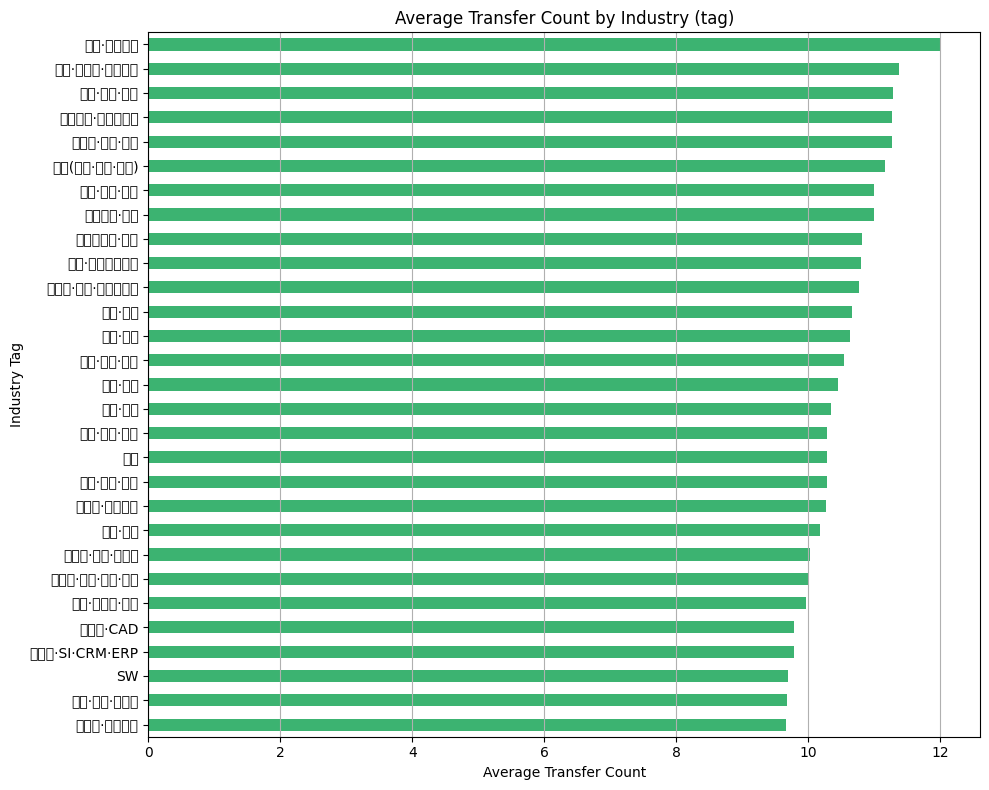

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 산업(tag)별 이직 횟수 평균 계산
tag_transfer_mean = df_j.groupby('tag')['transfer_count'].mean().sort_values(ascending=True)

# 시각화
plt.figure(figsize=(10, 8))
tag_transfer_mean.plot(kind='barh', color='mediumseagreen')
plt.title('Average Transfer Count by Industry (tag)')
plt.xlabel('Average Transfer Count')
plt.ylabel('Industry Tag')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

#### 개인별 이직 특징

In [ ]:
for col in df.columns:
    print(col)

Unnamed: 0_df1
orghid98
orghid09
orghid18
hhid26_df1
sample18_x
h260141
h260150
h260221
h260222
h260223
h260224
h260225
h260301
h260302
h260304
h260661
h260662
h260741
h260742
h260761
h260764
h261302
h261306
h261308
h261314
h261315
h261410
h261412
h261413
h261414
h262101
h262102
h263330
h263331
h263332
h263333
h263334
h263335
h262121
h262131
h262134
h262151
h262153
h262153a
h262158
h262201
h262202
h262205
h262207
h262301
h262311
h262312
h262313
h262314
h262315
h262316
h262317
h262319
h262321
h262324
h262325
h262326
h262328
h262332
h262329
h262401
h262402
h262412
h262415
h262416
h262421
h262521
h262566
h262567
h262601
h262610
h262632
h262653
h269102
h269103
w26h
sw26h
nw26h
pid
a266106
a266116
a266305
a266306
jobnum1
a266501
a266510
a266522
a266523
a266524
a266525
a266526
hhid26_x
hmem26_x
sample18_y
hwaveent
p260104
p260105
p260106
p260107
p260110
p260114
p260115
p260121
jobclass_x
jobnum_x
jobtype_x
p260201
p260202
p260203
p260205
p260211
p260311
p260340
p260341
p260342
p260350
p26035

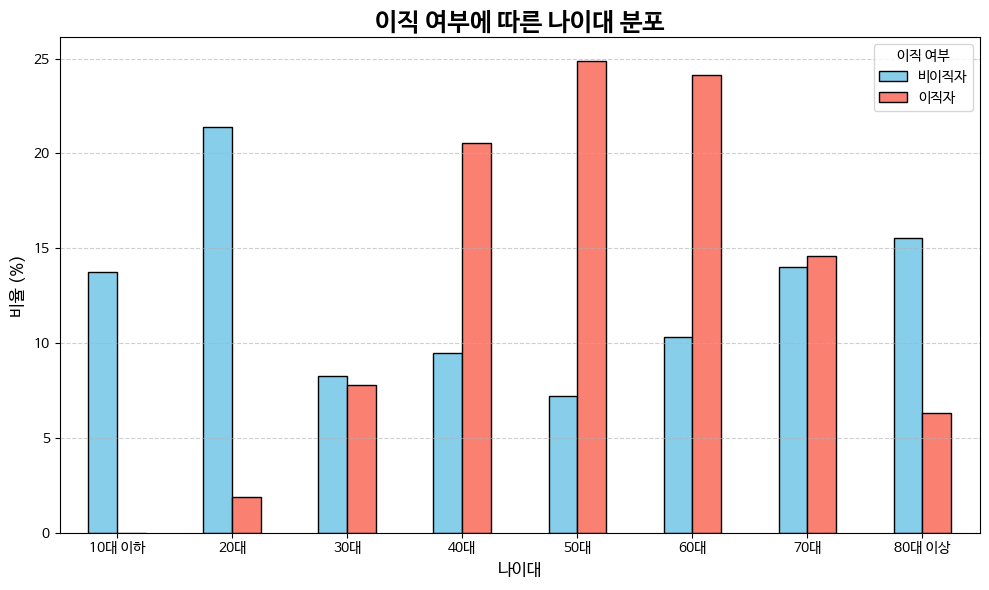

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 기준 연도 설정 (예: 2024년 기준으로 나이 계산)
base_year = 2024
df['age'] = base_year - df['p260104']

# 나이대 그룹 설정 (10단위 그룹핑)
bins = [0, 19, 29, 39, 49, 59, 69, 79, 100]
labels = ['10대 이하', '20대', '30대', '40대', '50대', '60대', '70대', '80대 이상']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True)

# 이직 여부별 나이대 분포 계산
age_dist = pd.crosstab(df['age_group'], df['transfer'], normalize='columns') * 100
age_dist.columns = ['비이직자', '이직자']

# 시각화
age_dist.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('이직 여부에 따른 나이대 분포', fontsize=18, weight='bold')
plt.xlabel('나이대', fontsize=12)
plt.ylabel('비율 (%)', fontsize=12)
plt.legend(title='이직 여부')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

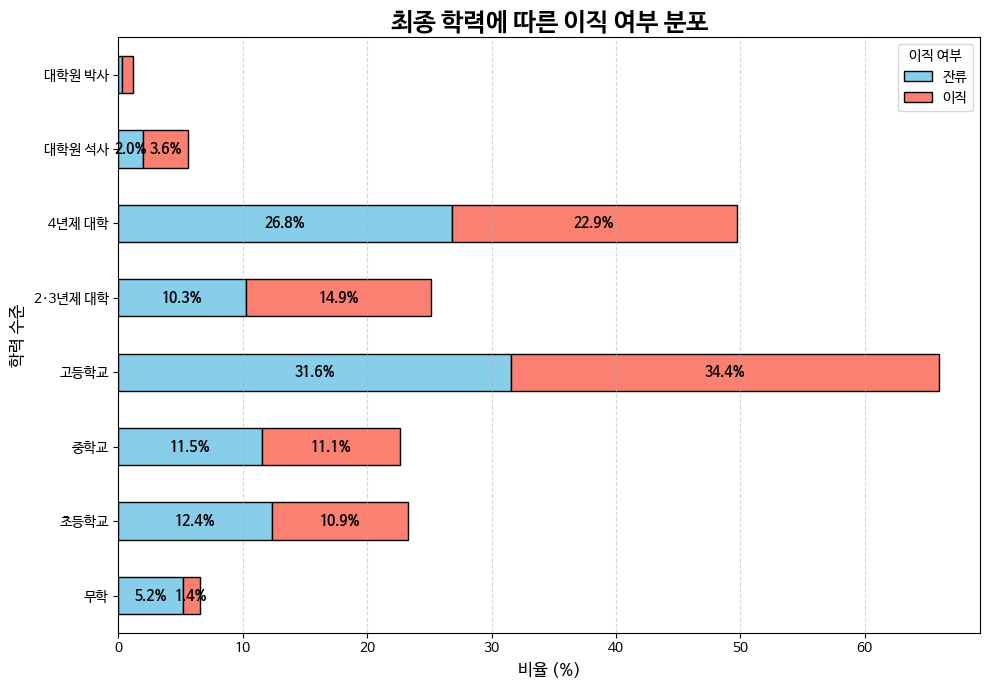

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 학력 코드 매핑
p0110_labels = {
    1: '미취학',
    2: '무학',
    3: '초등학교',
    4: '중학교',
    5: '고등학교',
    6: '2·3년제 대학',
    7: '4년제 대학',
    8: '대학원 석사',
    9: '대학원 박사'
}
df['p0110_label'] = df['p260110'].map(p0110_labels)

# 순서 지정
ordered_levels = ['무학', '초등학교', '중학교', '고등학교',
                  '2·3년제 대학', '4년제 대학', '대학원 석사', '대학원 박사']

# 이직 여부에 따른 분포 계산
p0110_counts = pd.crosstab(df['p0110_label'], df['transfer'], normalize='columns') * 100
p0110_counts = p0110_counts.reindex(ordered_levels)
p0110_counts.columns = ['잔류', '이직']

# 시각화
fig, ax = plt.subplots(figsize=(10, 7))
p0110_counts.plot(kind='barh', stacked=True, ax=ax,
                  color=['skyblue', 'salmon'], edgecolor='black')

# % 표시 (단, '대학원 박사'는 생략)
for i, (idx, row) in enumerate(p0110_counts.iterrows()):
    if idx != '대학원 박사':
        ax.text(row['잔류'] / 2, i, f"{row['잔류']:.1f}%", ha='center', va='center', fontsize=10, weight='bold')
        ax.text(row['잔류'] + row['이직'] / 2, i, f"{row['이직']:.1f}%", ha='center', va='center', fontsize=10, weight='bold')

# 제목과 레이아웃
plt.title('최종 학력에 따른 이직 여부 분포', fontsize=18, weight='bold')
plt.xlabel('비율 (%)', fontsize=12)
plt.ylabel('학력 수준', fontsize=12)
plt.legend(title='이직 여부', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

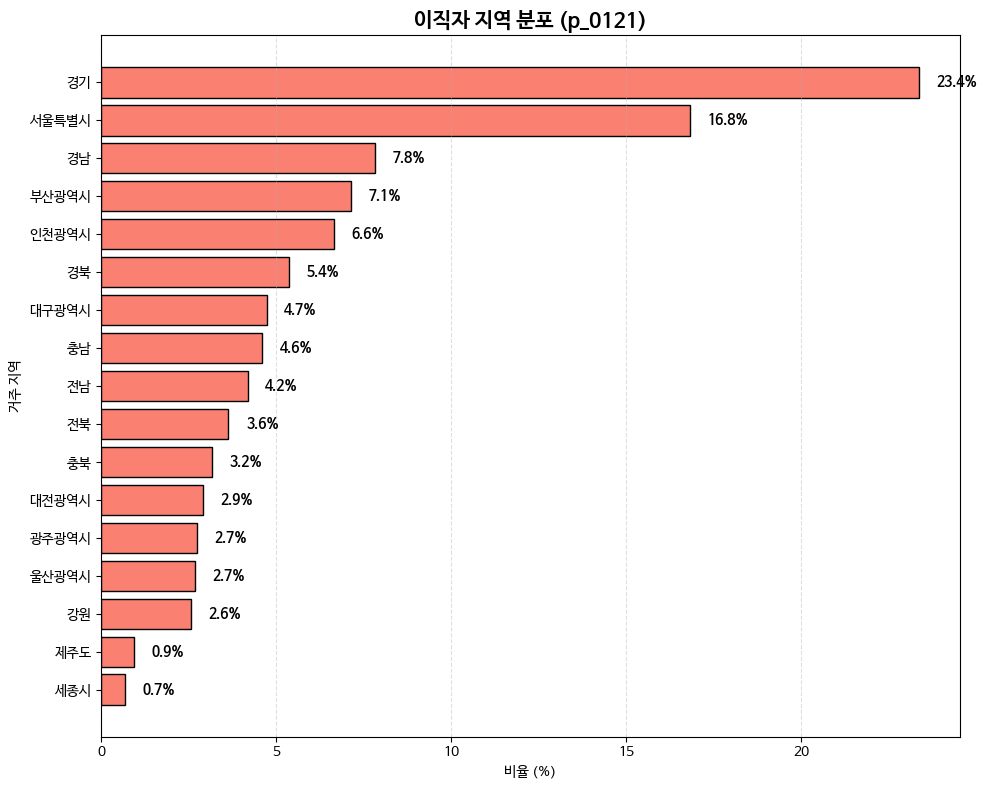

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 지역 코드 → 지역명 매핑
region_map = {
    1: '서울특별시', 2: '부산광역시', 3: '대구광역시', 4: '대전광역시', 5: '인천광역시',
    6: '광주광역시', 7: '울산광역시', 8: '경기', 9: '강원', 10: '충북',
    11: '충남', 12: '전북', 13: '전남', 14: '경북', 15: '경남',
    16: '제주도', 17: '이북', 18: '외국', 19: '세종시'
}

df['region'] = df['p260121'].map(region_map)

# 이직자에 한해 지역 분포 시각화
region_counts = df[df['transfer'] == 1]['region'].value_counts(normalize=True).sort_values() * 100

# 시각화
plt.figure(figsize=(10, 8))
bars = plt.barh(region_counts.index, region_counts.values, color='salmon', edgecolor='black')

# % 텍스트 추가
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f'{width:.1f}%', va='center', fontsize=10, weight='bold')

# 제목과 축 설정
plt.title('이직자 지역 분포 (p_0121)', fontsize=15, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('거주 지역')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

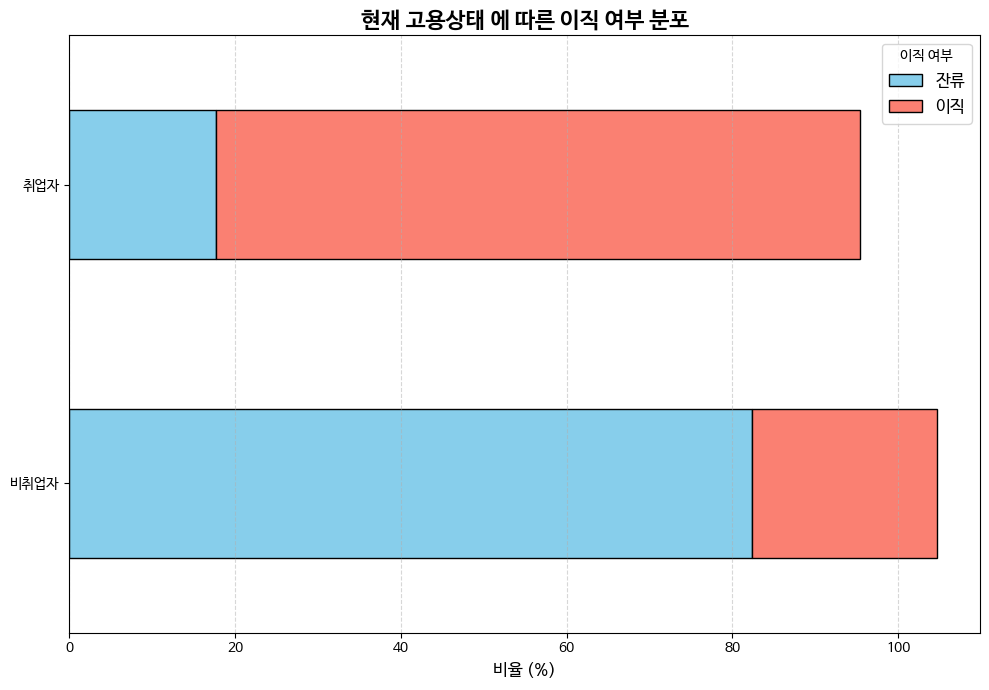

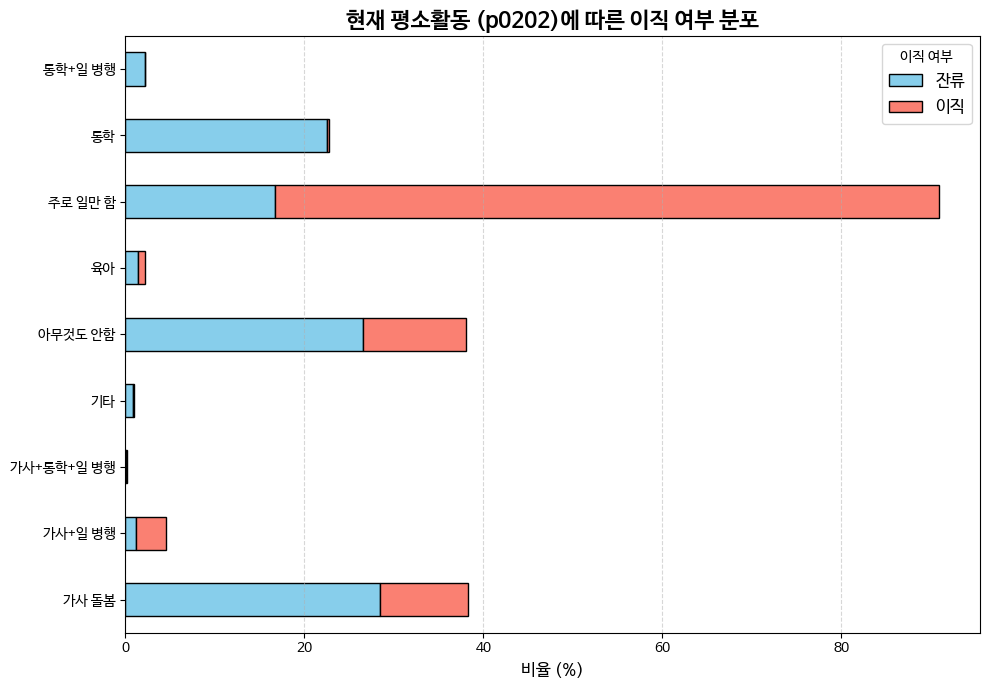

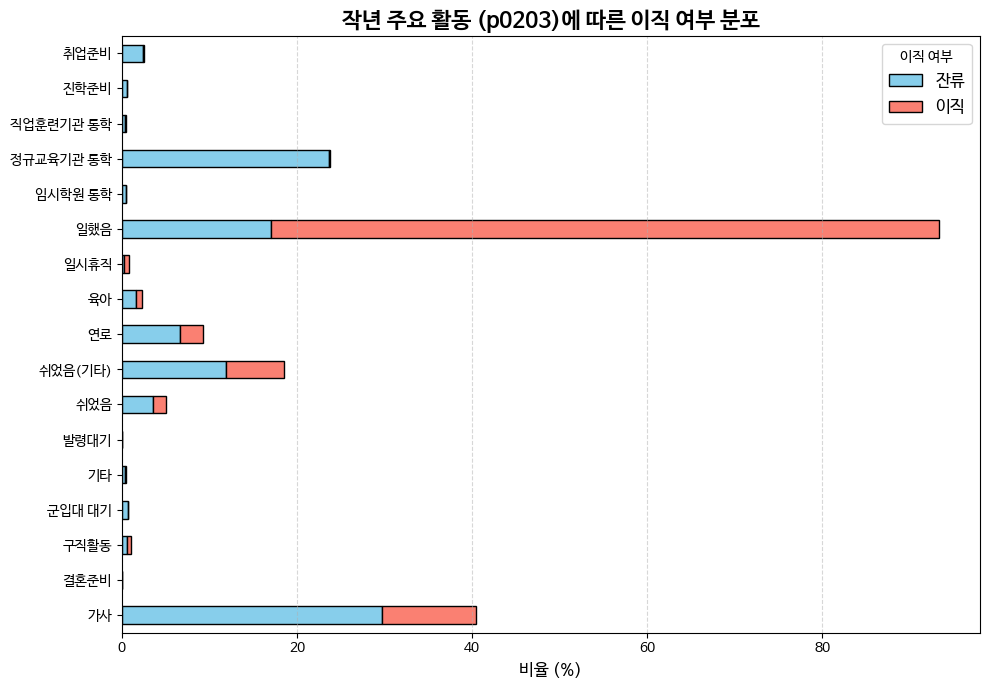

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 각 칼럼별 라벨 정의
p0201_labels = {
    1: '취업자',
    2: '비취업자'
}
p0202_labels = {
    1: '주로 일만 함',
    2: '가사+일 병행',
    3: '통학+일 병행',
    4: '가사+통학+일 병행',
    5: '가사 돌봄',
    6: '육아',
    7: '통학',
    8: '아무것도 안함',
    9: '기타'
}
p0203_labels = {
    1: '일했음', 2: '일시휴직', 3: '구직활동', 4: '가사', 5: '육아',
    6: '정규교육기관 통학', 7: '임시학원 통학', 8: '직업훈련기관 통학',
    9: '연로', 10: '쉬었음', 11: '취업준비', 12: '진학준비',
    13: '군입대 대기', 14: '발령대기', 15: '결혼준비', 16: '일자리 구함',
    17: '쉬었음(기타)', 18: '기타', 19: '퇴직'
}

# 시각화 함수
def plot_transfer_distribution(df, col, label_map, title):
    df[f'{col}_label'] = df[col].map(label_map)
    counts = pd.crosstab(df[f'{col}_label'], df['transfer'], normalize='columns') * 100
    counts = counts.fillna(0)  # 혹시라도 누락된 경우
    counts.columns = ['잔류', '이직']

    fig, ax = plt.subplots(figsize=(10, 7))
    counts.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'salmon'], edgecolor='black')

    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel('비율 (%)', fontsize=12)
    plt.ylabel('')
    plt.legend(title='이직 여부', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# 각각 시각화
plot_transfer_distribution(df, 'p260201', p0201_labels, '현재 고용상태 에 따른 이직 여부 분포')
plot_transfer_distribution(df, 'p260202', p0202_labels, '현재 평소활동 (p0202)에 따른 이직 여부 분포')
plot_transfer_distribution(df, 'p260203', p0203_labels, '작년 주요 활동 (p0203)에 따른 이직 여부 분포')

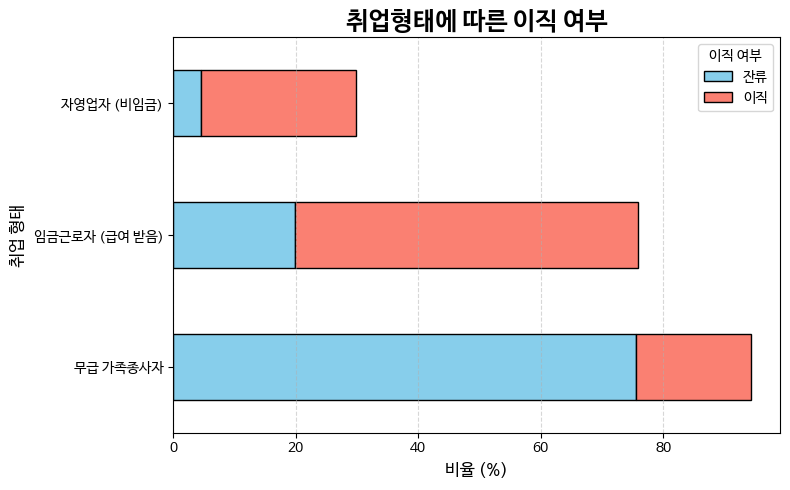

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# p0211 코드 매핑
p0211_labels = {
    1: '임금근로자 (급여 받음)',
    2: '자영업자 (비임금)',
    3: '무급 가족종사자'
}
df['p0211_label'] = df['p260211'].map(p0211_labels)

# 이직 여부에 따른 분포 계산
p0211_counts = pd.crosstab(df['p0211_label'], df['transfer'], normalize='columns') * 100
p0211_counts.columns = ['잔류', '이직']

# 시각화
fig, ax = plt.subplots(figsize=(8, 5))
p0211_counts.plot(kind='barh', stacked=True, ax=ax,
                  color=['skyblue', 'salmon'], edgecolor='black')

plt.title('취업형태에 따른 이직 여부', fontsize=18, weight='bold')
plt.xlabel('비율 (%)', fontsize=12)
plt.ylabel('취업 형태', fontsize=12)
plt.legend(title='이직 여부', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

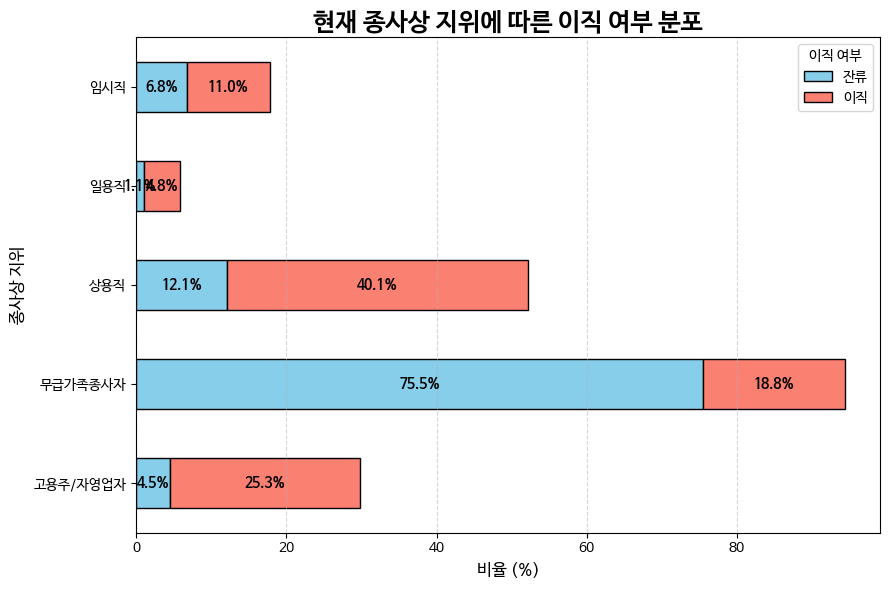

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 종사상 지위 코드 매핑
p0314_labels = {
    1: '상용직',
    2: '임시직',
    3: '일용직',
    4: '고용주/자영업자',
    5: '무급가족종사자'
}
df['p0314_label'] = df['p260314'].map(p0314_labels)

# 이직 여부에 따른 분포 계산
p0314_counts = pd.crosstab(df['p0314_label'], df['transfer'], normalize='columns') * 100
p0314_counts.columns = ['잔류', '이직']

# 시각화
fig, ax = plt.subplots(figsize=(9, 6))
p0314_counts.plot(kind='barh', stacked=True, ax=ax,
                  color=['skyblue', 'salmon'], edgecolor='black')

# 레이블 추가
for i, (idx, row) in enumerate(p0314_counts.iterrows()):
    ax.text(row['잔류'] / 2, i, f"{row['잔류']:.1f}%", ha='center', va='center', fontsize=10, weight='bold')
    ax.text(row['잔류'] + row['이직'] / 2, i, f"{row['이직']:.1f}%", ha='center', va='center', fontsize=10, weight='bold')

# 제목 및 레이아웃 설정
plt.title('현재 종사상 지위에 따른 이직 여부 분포', fontsize=18, weight='bold')
plt.xlabel('비율 (%)', fontsize=12)
plt.ylabel('종사상 지위', fontsize=12)
plt.legend(title='이직 여부', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv("해치웠나.csv")
df['연도'] = df['jobwave'].apply(lambda x: 2005 + int(x))
df = df[df['연도'] <= 2024]
df['코로나'] = df['연도'].apply(lambda y: '이전' if y < 2020 else '이후')

# 자영업 여부 결정
jobtype_cols = ['jobtype_x', 'jobtype_y']
df_jobtype = df[jobtype_cols + ['코로나']].dropna()
df_jobtype['자영업'] = df_jobtype[jobtype_cols].max(axis=1)
df_jobtype = df_jobtype[df_jobtype['자영업'].isin([1, 2])]
df_jobtype['자영업'] = df_jobtype['자영업'].map({1: '직장인', 2: '자영업자'})

# 자영업자 시기 레이블 반전
df_jobtype.loc[df_jobtype['자영업'] == '자영업자', '코로나'] = df_jobtype.loc[df_jobtype['자영업'] == '자영업자', '코로나'].map({'이전': '이후', '이후': '이전'})

# 시각화 색상
palette = {'이전': '#E69F00', '이후': '#56B4E9'}

# 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=df_jobtype, x='자영업', hue='코로나', palette=palette)

# 제목과 라벨 크기 확대
plt.title("자영업 여부별 코로나 이전/이후 비율", fontsize=21, fontweight='bold')  # 14 × 1.5
plt.xlabel("자영업 여부", fontsize=18)  # 12 × 1.5
plt.ylabel("빈도수", fontsize=18)      # 12 × 1.5
plt.legend(title="시기", fontsize=13, title_fontsize=14)

plt.tight_layout()
plt.show()

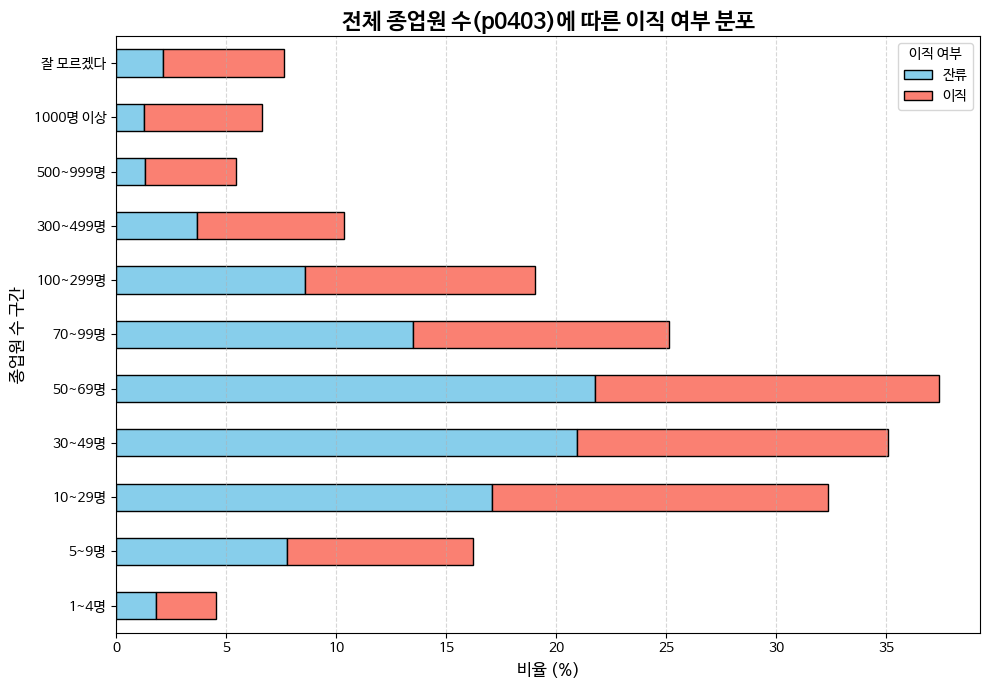

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 종업원 수 범주 코드 매핑
p0403_labels = {
    1: '1~4명',
    2: '5~9명',
    3: '10~29명',
    4: '30~49명',
    5: '50~69명',
    6: '70~99명',
    7: '100~299명',
    8: '300~499명',
    9: '500~999명',
    10: '1000명 이상',
    11: '잘 모르겠다'
}
df['p0403_label'] = df['p260403'].map(p0403_labels)

# 순서 지정
ordered_levels = list(p0403_labels.values())

# 이직 여부에 따른 분포 계산
p0403_counts = pd.crosstab(df['p0403_label'], df['transfer'], normalize='columns') * 100
p0403_counts = p0403_counts.reindex(ordered_levels)
p0403_counts.columns = ['잔류', '이직']

# 시각화
fig, ax = plt.subplots(figsize=(10, 7))
p0403_counts.plot(kind='barh', stacked=True, ax=ax,
                  color=['skyblue', 'salmon'], edgecolor='black')

plt.title('전체 종업원 수(p0403)에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)', fontsize=12)
plt.ylabel('종업원 수 구간', fontsize=12)
plt.legend(title='이직 여부', fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

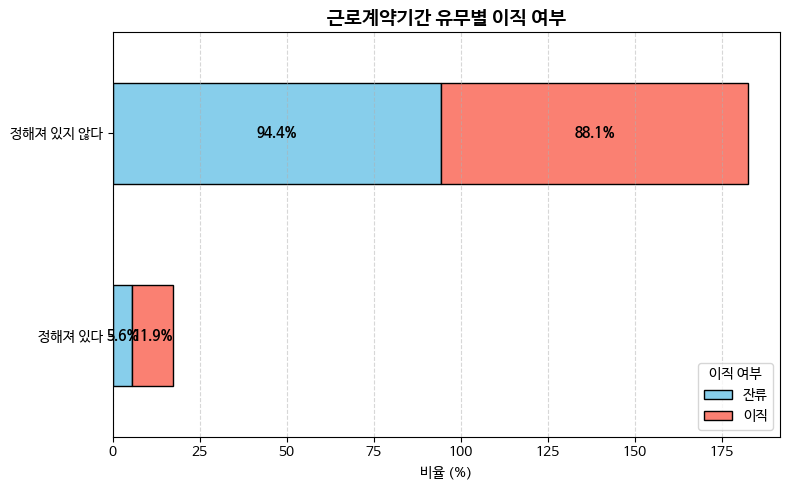

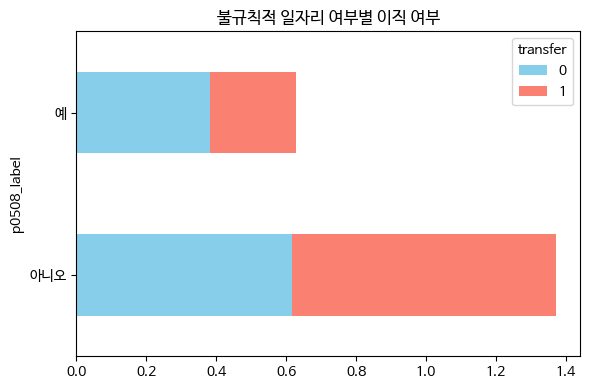

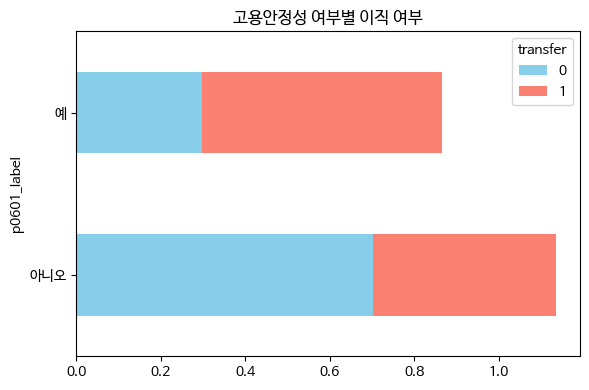

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. p_0501: 근로계약기간 유무
p0501_labels = {1: '정해져 있다', 2: '정해져 있지 않다', 3: '모른다'}
df['p0501_label'] = df['p260501'].map(p0501_labels)

# 교차표 생성
p0501_counts = pd.crosstab(df['p0501_label'], df['transfer'], normalize='columns') * 100
p0501_counts.columns = ['잔류', '이직']

# 시각화
fig, ax = plt.subplots(figsize=(8, 5))
p0501_counts.plot(kind='barh', stacked=True, ax=ax, color=['skyblue', 'salmon'], edgecolor='black')

# 레이블 추가
for i, (idx, row) in enumerate(p0501_counts.iterrows()):
    ax.text(row['잔류'] / 2, i, f"{row['잔류']:.1f}%", ha='center', va='center', fontsize=10, weight='bold')
    ax.text(row['잔류'] + row['이직'] / 2, i, f"{row['이직']:.1f}%", ha='center', va='center', fontsize=10, weight='bold')

# 라벨 및 제목
plt.title('근로계약기간 유무별 이직 여부', fontsize=14, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# 2. p_0508: 불규칙적 일자리 여부
p0508_labels = {1: '예', 2: '아니오'}
df['p0508_label'] = df['p260508'].map(p0508_labels)
pd.crosstab(df['p0508_label'], df['transfer'], normalize='columns') \
    .plot(kind='barh', stacked=True, figsize=(6, 4), title='불규칙적 일자리 여부별 이직 여부', color=['skyblue', 'salmon'])
plt.tight_layout()
plt.show()

# 3. p_0601: 고용안정성
p0601_labels = {1: '예', 2: '아니오'}
df['p0601_label'] = df['p260601'].map(p0601_labels)
pd.crosstab(df['p0601_label'], df['transfer'], normalize='columns') \
    .plot(kind='barh', stacked=True, figsize=(6, 4), title='고용안정성 여부별 이직 여부', color=['skyblue', 'salmon'])
plt.tight_layout()
plt.show()

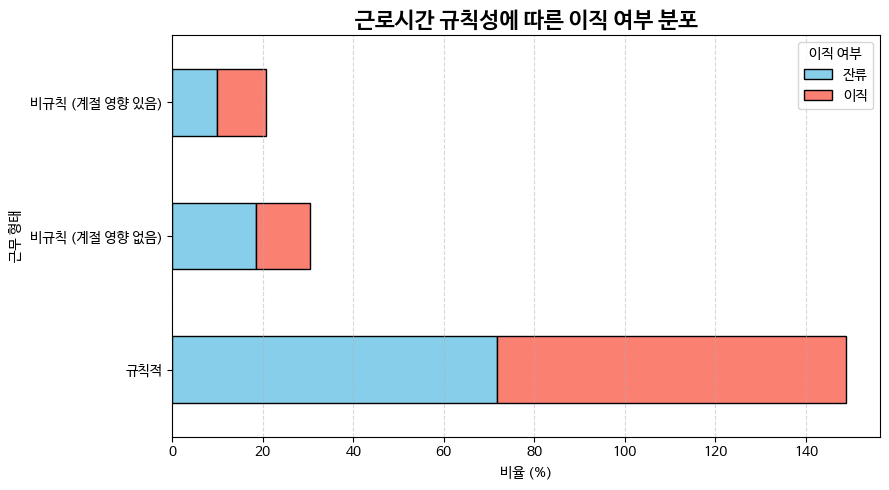

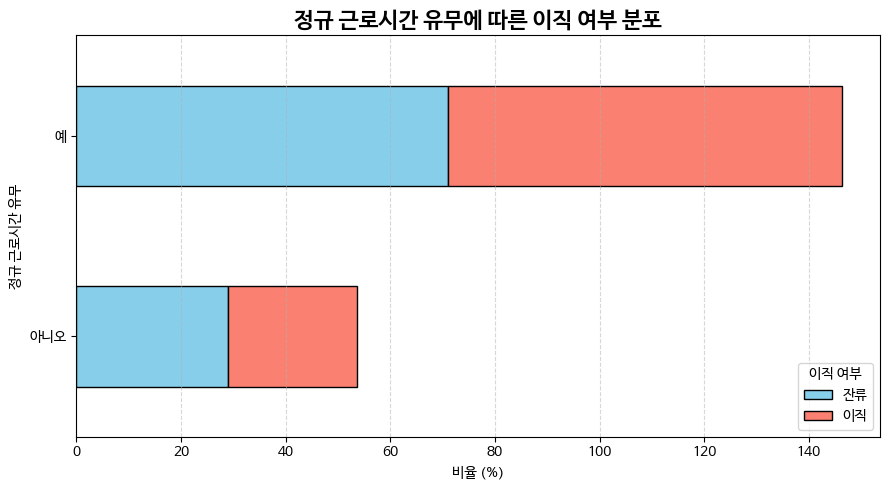

<Figure size 900x500 with 0 Axes>

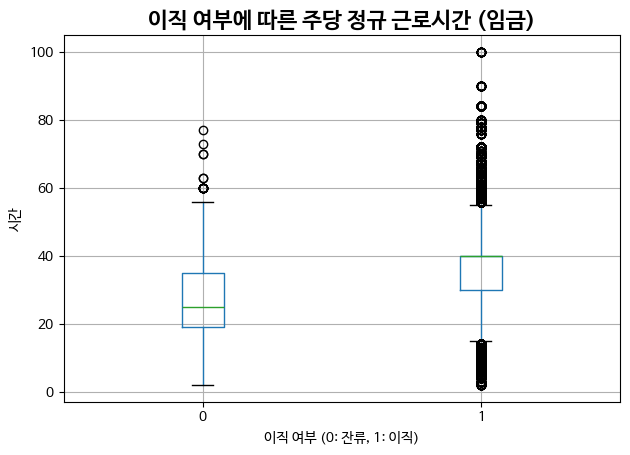

<Figure size 900x500 with 0 Axes>

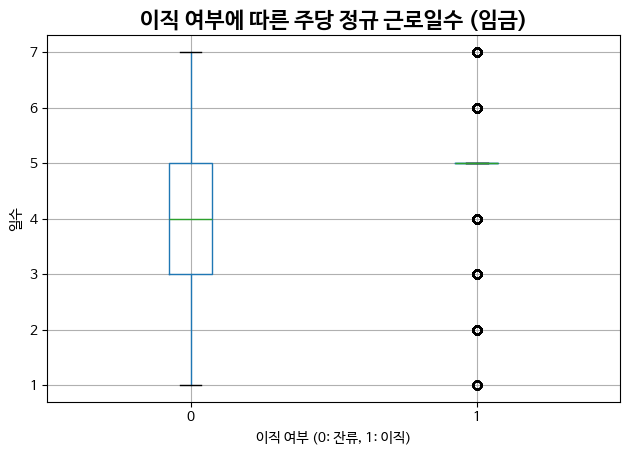

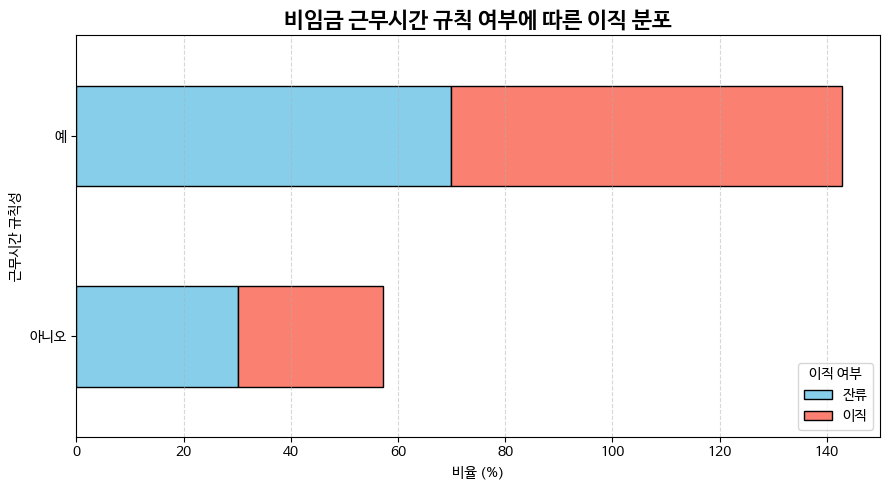

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 근로시간 규칙성 (p_1002 → p_261002)
p1002_map = {
    1: '규칙적',
    2: '비규칙 (계절 영향 없음)',
    3: '비규칙 (계절 영향 있음)'
}
df['p261002_label'] = df['p261002'].map(p1002_map)
counts_1002 = pd.crosstab(df['p261002_label'], df['transfer'], normalize='columns') * 100
counts_1002.columns = ['잔류', '이직']
counts_1002.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('근로시간 규칙성에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('근무 형태')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 정규근로시간 여부 (p_1003 → p_261003)
p1003_map = {1: '예', 2: '아니오'}
df['p261003_label'] = df['p261003'].map(p1003_map)
counts_1003 = pd.crosstab(df['p261003_label'], df['transfer'], normalize='columns') * 100
counts_1003.columns = ['잔류', '이직']
counts_1003.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('정규 근로시간 유무에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('정규 근로시간 유무')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 주당 정규 근로시간 (p_1006 → p_261006)
plt.figure(figsize=(9, 5))
df.boxplot(column='p261006', by='transfer', grid=True)
plt.title('이직 여부에 따른 주당 정규 근로시간 (임금)', fontsize=16, weight='bold')
plt.suptitle('')
plt.xlabel('이직 여부 (0: 잔류, 1: 이직)')
plt.ylabel('시간')
plt.tight_layout()
plt.show()

# 주당 정규 근로일수 (p_1007 → p_261007)
plt.figure(figsize=(9, 5))
df.boxplot(column='p261007', by='transfer', grid=True)
plt.title('이직 여부에 따른 주당 정규 근로일수 (임금)', fontsize=16, weight='bold')
plt.suptitle('')
plt.xlabel('이직 여부 (0: 잔류, 1: 이직)')
plt.ylabel('일수')
plt.tight_layout()
plt.show()

# 비임금 근무시간이 규칙적으로 정해져 있는지 (p_1151 → p_261151)
p1151_map = {1: '예', 2: '아니오'}
df['p261151_label'] = df['p261151'].map(p1151_map)
counts_1151 = pd.crosstab(df['p261151_label'], df['transfer'], normalize='columns') * 100
counts_1151.columns = ['잔류', '이직']
counts_1151.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('비임금 근무시간 규칙 여부에 따른 이직 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('근무시간 규칙성')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 900x500 with 0 Axes>

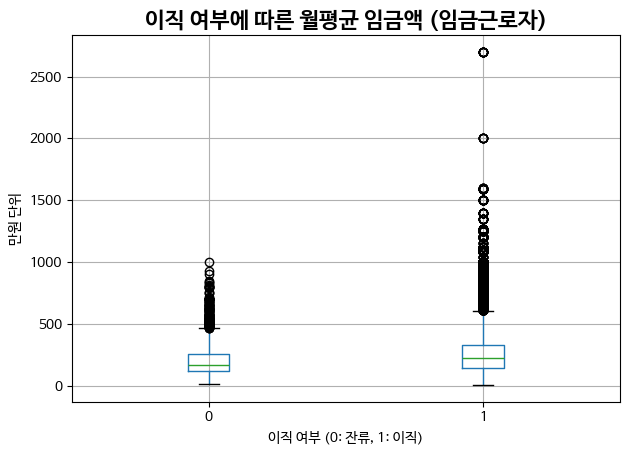

<Figure size 900x500 with 0 Axes>

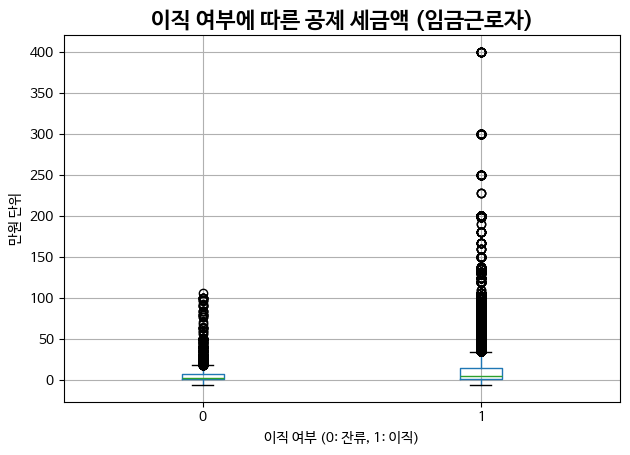

<Figure size 900x500 with 0 Axes>

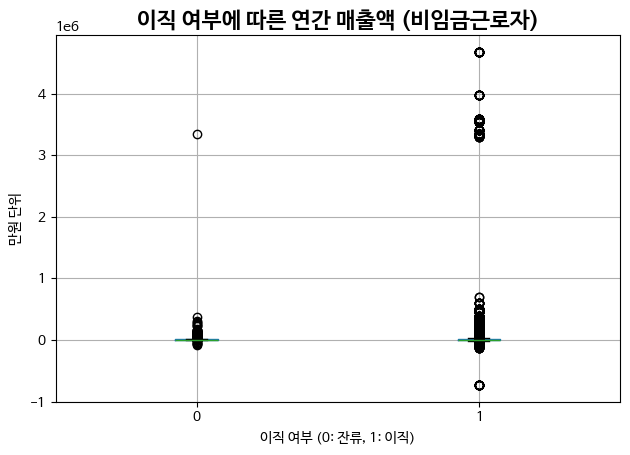

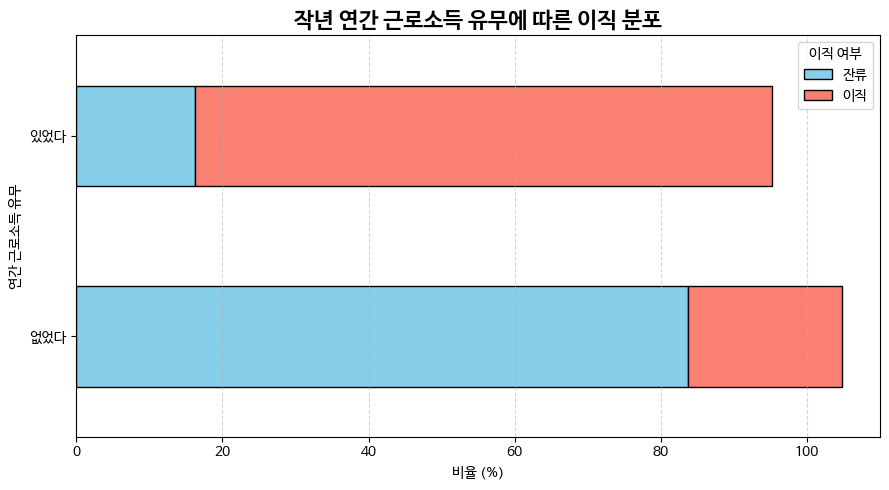

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# p1642: 임금근로자 월평균임금액수
plt.figure(figsize=(9, 5))
df.boxplot(column='p261642', by='transfer', grid=True)
plt.title('이직 여부에 따른 월평균 임금액 (임금근로자)', fontsize=16, weight='bold')
plt.suptitle('')
plt.xlabel('이직 여부 (0: 잔류, 1: 이직)')
plt.ylabel('만원 단위')
plt.tight_layout()
plt.show()

# p1643: 임금근로자 공제되는 세금
plt.figure(figsize=(9, 5))
df.boxplot(column='p261643', by='transfer', grid=True)
plt.title('이직 여부에 따른 공제 세금액 (임금근로자)', fontsize=16, weight='bold')
plt.suptitle('')
plt.xlabel('이직 여부 (0: 잔류, 1: 이직)')
plt.ylabel('만원 단위')
plt.tight_layout()
plt.show()

# p1662: 비임금근로자 연간매출액
plt.figure(figsize=(9, 5))
df.boxplot(column='p261662', by='transfer', grid=True)
plt.title('이직 여부에 따른 연간 매출액 (비임금근로자)', fontsize=16, weight='bold')
plt.suptitle('')
plt.xlabel('이직 여부 (0: 잔류, 1: 이직)')
plt.ylabel('만원 단위')
plt.tight_layout()
plt.show()

# p1701: 작년 연간근로소득유무
p1701_map = {1: '있었다', 2: '없었다'}
df['p261701_label'] = df['p261701'].map(p1701_map)
counts_1701 = pd.crosstab(df['p261701_label'], df['transfer'], normalize='columns') * 100
counts_1701.columns = ['잔류', '이직']
counts_1701.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('작년 연간 근로소득 유무에 따른 이직 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('연간 근로소득 유무')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

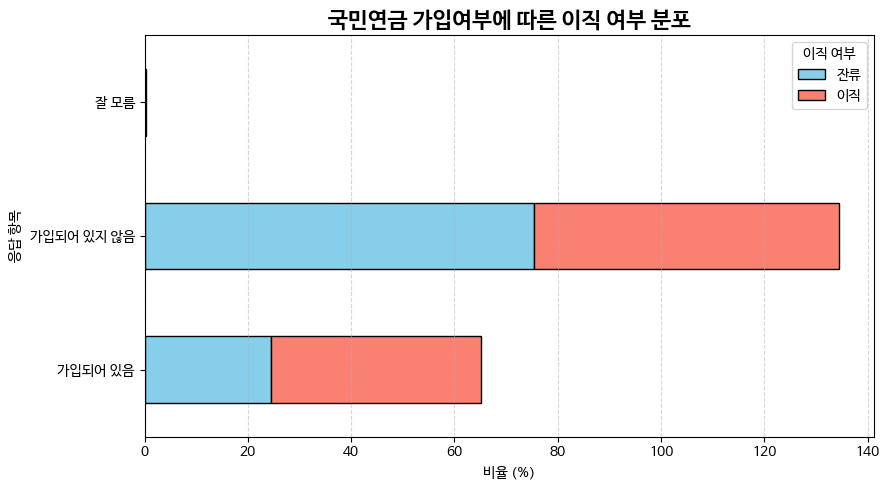

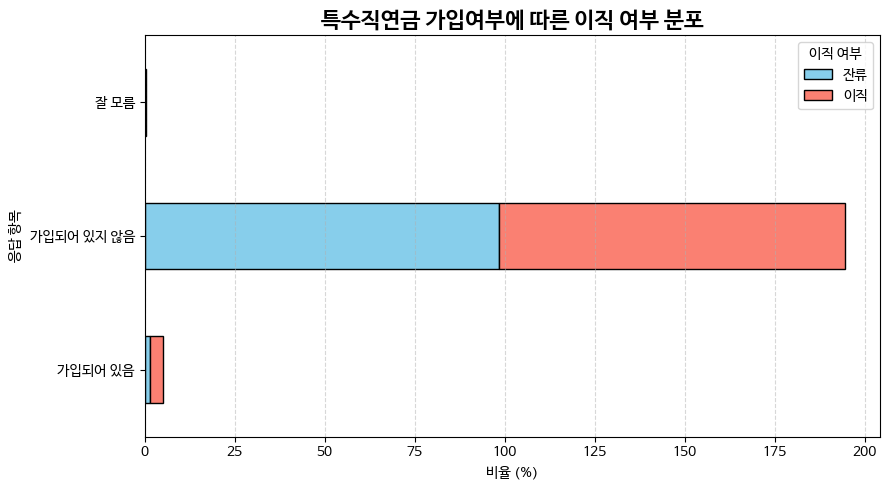

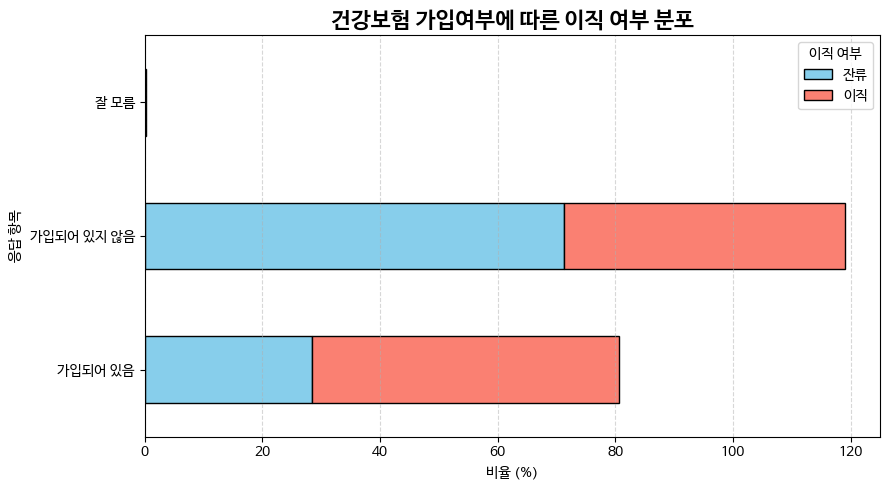

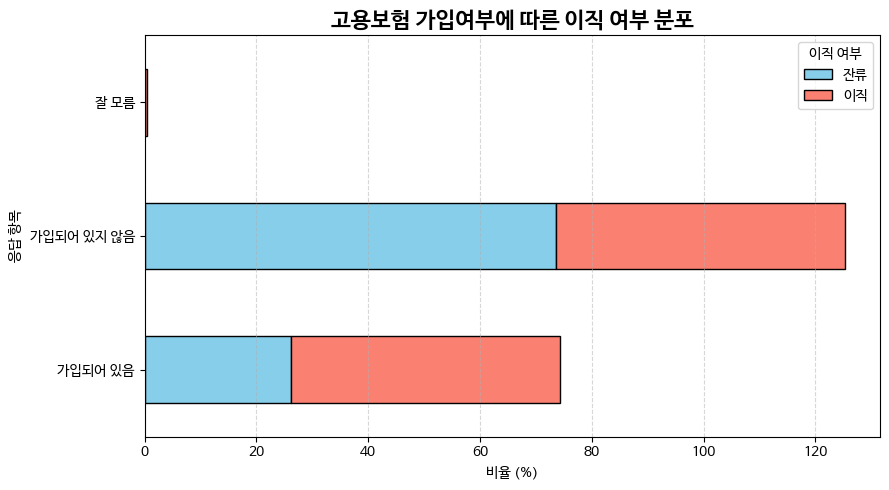

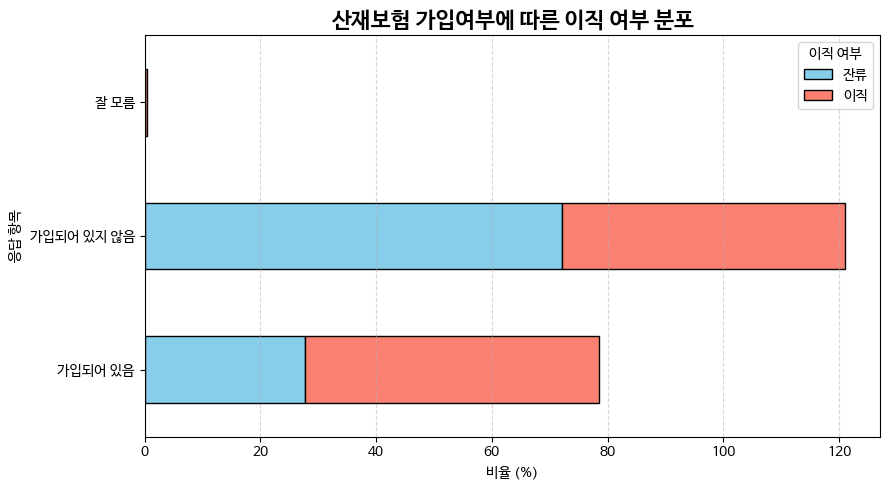

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 변수와 라벨 매핑 정의
insurance_vars = {
    'p262101': '국민연금 가입여부',
    'p262102': '특수직연금 가입여부',
    'p262103': '건강보험 가입여부',
    'p262104': '고용보험 가입여부',
    'p262105': '산재보험 가입여부'
}

label_map = {
    1: '가입되어 있음',
    2: '가입되어 있지 않음',
    3: '잘 모름'
}

# 시각화 반복
for var, title in insurance_vars.items():
    df[f'{var}_label'] = df[var].map(label_map)
    counts = pd.crosstab(df[f'{var}_label'], df['transfer'], normalize='columns') * 100
    counts.columns = ['잔류', '이직']
    counts.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
    plt.title(f'{title}에 따른 이직 여부 분포', fontsize=16, weight='bold')
    plt.xlabel('비율 (%)')
    plt.ylabel('응답 항목')
    plt.legend(title='이직 여부')
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

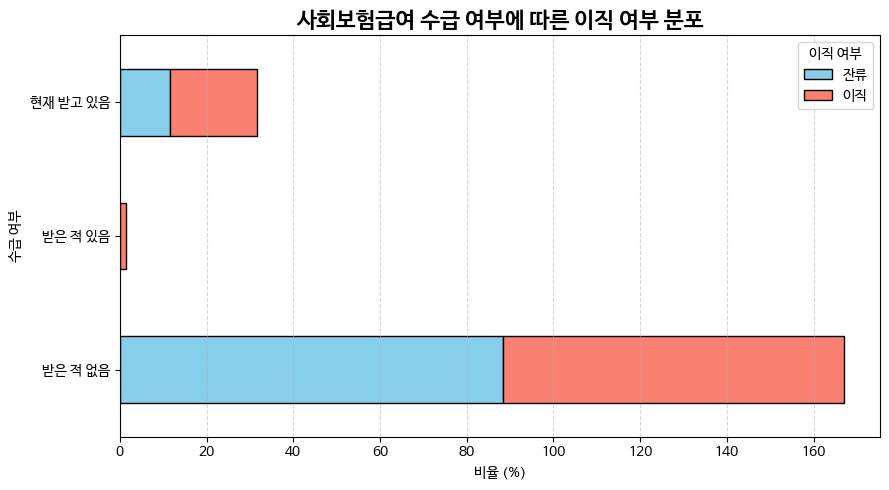

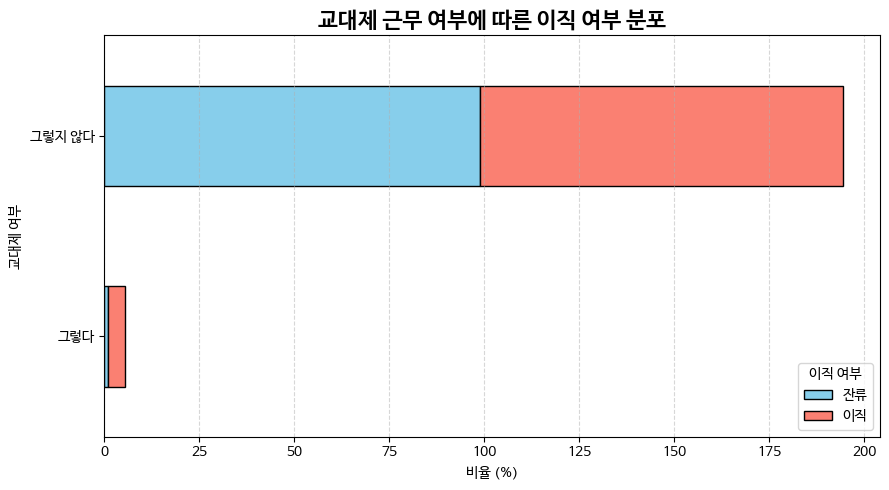

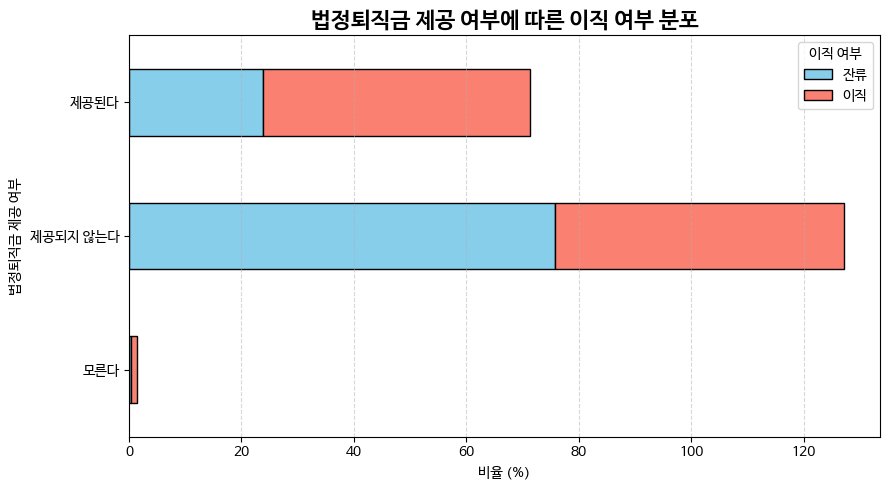

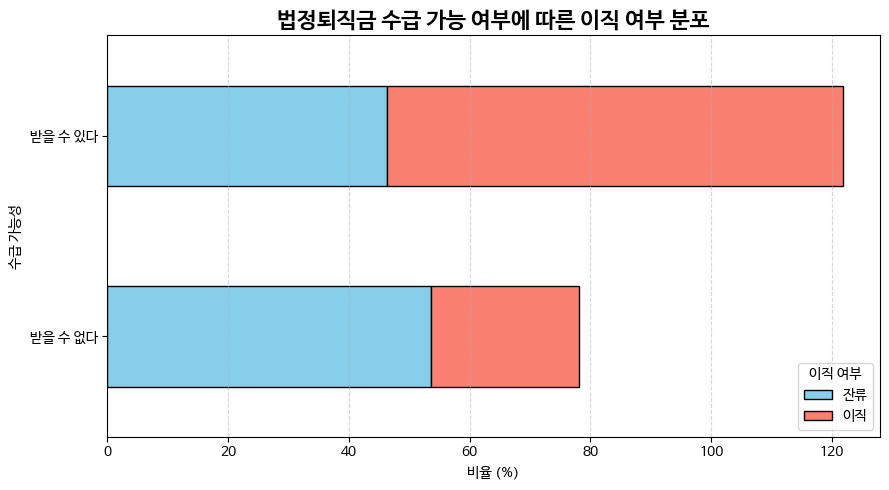

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# p2142: 사회보험급여수급여부 → p262142
p2142_map = {
    1: '받은 적 있음',
    2: '현재 받고 있음',
    3: '받은 적 없음'
}
df['p261142_label'] = df['p262142'].map(p2142_map)
counts_2142 = pd.crosstab(df['p261142_label'], df['transfer'], normalize='columns') * 100
counts_2142.columns = ['잔류', '이직']
counts_2142.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('사회보험급여 수급 여부에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('수급 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# p2601: 교대제 여부 → p262601
p2601_map = {1: '그렇다', 2: '그렇지 않다'}
df['p261601_label'] = df['p262601'].map(p2601_map)
counts_2601 = pd.crosstab(df['p261601_label'], df['transfer'], normalize='columns') * 100
counts_2601.columns = ['잔류', '이직']
counts_2601.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('교대제 근무 여부에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('교대제 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# p4101: 직장에서 법정퇴직금 제공 여부 → p264101
p4101_map = {
    1: '제공된다',
    2: '제공되지 않는다',
    3: '모른다'
}
df['p264101_label'] = df['p264101'].map(p4101_map)
counts_4101 = pd.crosstab(df['p264101_label'], df['transfer'], normalize='columns') * 100
counts_4101.columns = ['잔류', '이직']
counts_4101.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('법정퇴직금 제공 여부에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('법정퇴직금 제공 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# p4102: 본인의 법정퇴직금 수급 가능성 → p264102
p4102_map = {1: '받을 수 있다', 2: '받을 수 없다'}
df['p264102_label'] = df['p264102'].map(p4102_map)
counts_4102 = pd.crosstab(df['p264102_label'], df['transfer'], normalize='columns') * 100
counts_4102.columns = ['잔류', '이직']
counts_4102.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('법정퇴직금 수급 가능 여부에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('수급 가능성')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

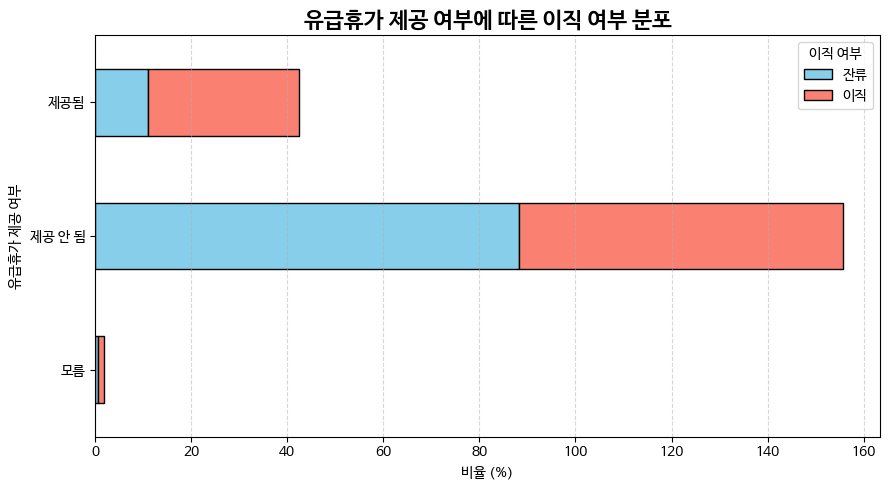

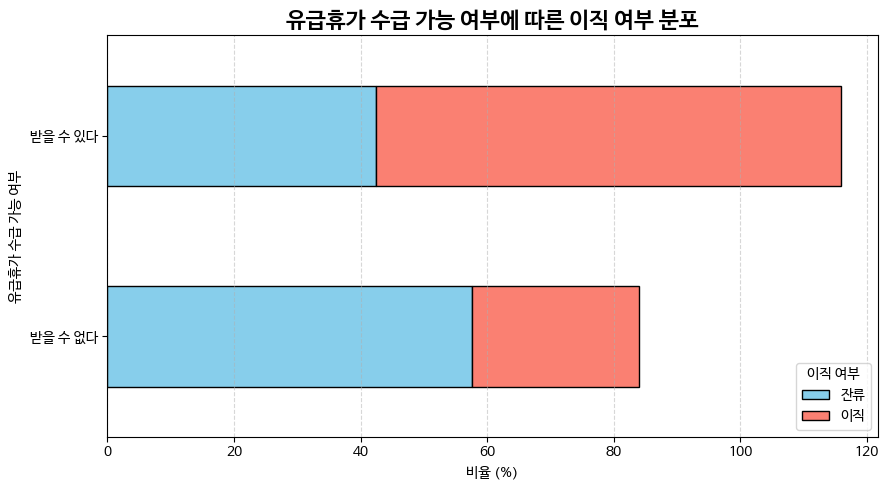

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 유급휴가 제공 여부 (p4105 → p264105)
p4105_map = {
    1: '제공됨',
    2: '제공 안 됨',
    3: '모름'
}
df['p264105_label'] = df['p264105'].map(p4105_map)
counts_4105 = pd.crosstab(df['p264105_label'], df['transfer'], normalize='columns') * 100
counts_4105.columns = ['잔류', '이직']
counts_4105.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('유급휴가 제공 여부에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('유급휴가 제공 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 유급휴가 수급 가능 여부 (p4106 → p264106)
p4106_map = {
    1: '받을 수 있다',
    2: '받을 수 없다'
}
df['p264106_label'] = df['p264106'].map(p4106_map)
counts_4106 = pd.crosstab(df['p264106_label'], df['transfer'], normalize='columns') * 100
counts_4106.columns = ['잔류', '이직']
counts_4106.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('유급휴가 수급 가능 여부에 따른 이직 여부 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('유급휴가 수급 가능 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

<Figure size 900x500 with 0 Axes>

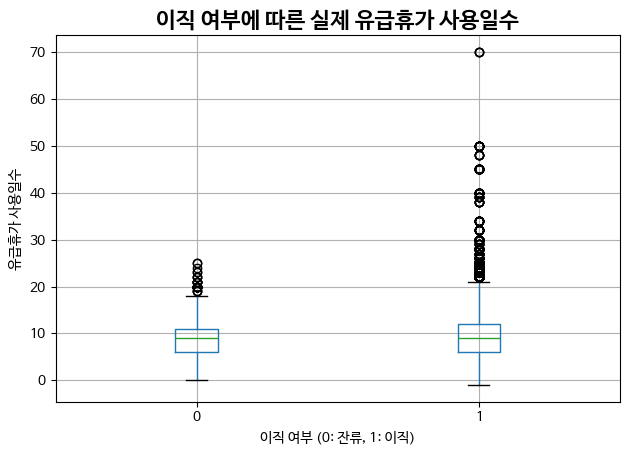

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# p264160: 실제 사용 유급휴가일수 (연속형 변수)
plt.figure(figsize=(9, 5))
df.boxplot(column='p264160', by='transfer', grid=True)
plt.title('이직 여부에 따른 실제 유급휴가 사용일수', fontsize=16, weight='bold')
plt.suptitle('')
plt.xlabel('이직 여부 (0: 잔류, 1: 이직)')
plt.ylabel('유급휴가 사용일수')
plt.tight_layout()
plt.show()

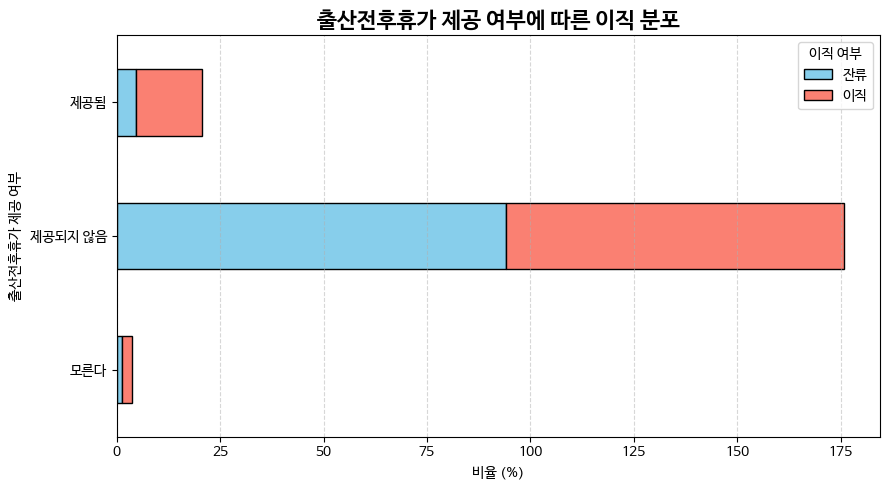

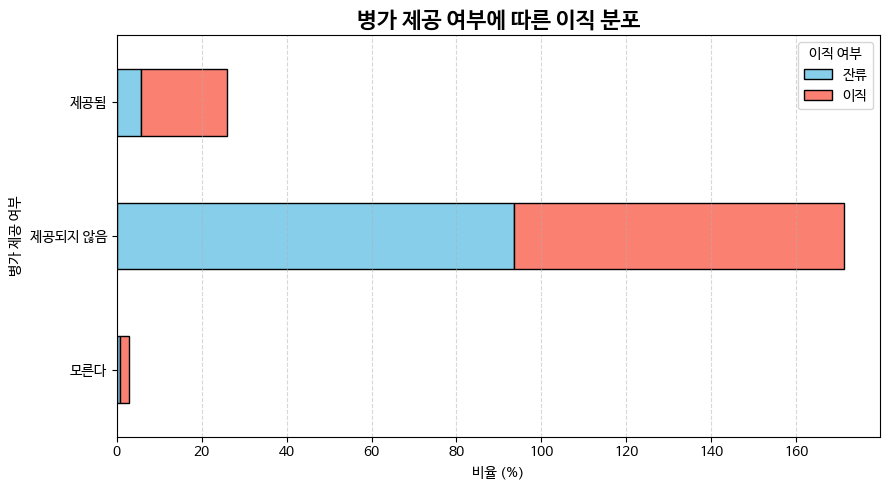

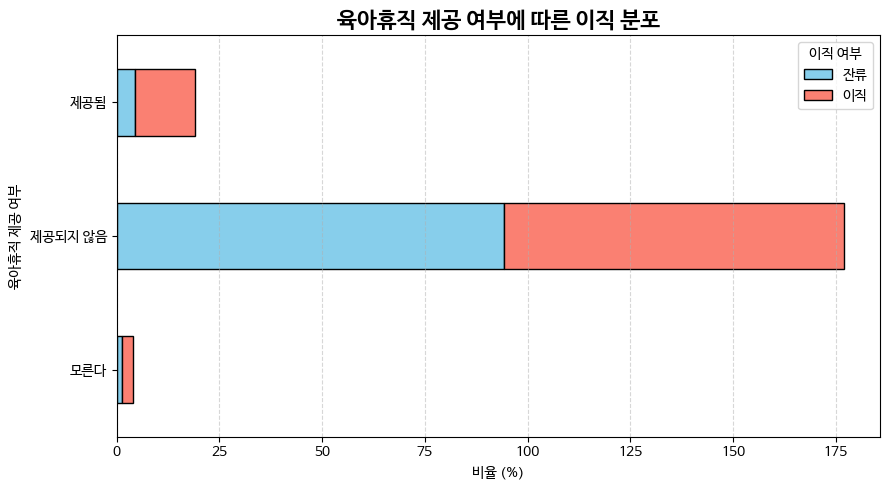

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 출산전후휴가 제공 여부 (p264109)
p4109_map = {1: '제공됨', 2: '제공되지 않음', 3: '모른다'}
df['p264109_label'] = df['p264109'].map(p4109_map)
counts_4109 = pd.crosstab(df['p264109_label'], df['transfer'], normalize='columns') * 100
counts_4109.columns = ['잔류', '이직']
counts_4109.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('출산전후휴가 제공 여부에 따른 이직 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('출산전후휴가 제공 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 병가 제공 여부 (p264111)
p4111_map = {1: '제공됨', 2: '제공되지 않음', 3: '모른다'}
df['p264111_label'] = df['p264111'].map(p4111_map)
counts_4111 = pd.crosstab(df['p264111_label'], df['transfer'], normalize='columns') * 100
counts_4111.columns = ['잔류', '이직']
counts_4111.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('병가 제공 여부에 따른 이직 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('병가 제공 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 육아휴직 제공 여부 (p264113)
p4113_map = {1: '제공됨', 2: '제공되지 않음', 3: '모른다'}
df['p264113_label'] = df['p264113'].map(p4113_map)
counts_4113 = pd.crosstab(df['p264113_label'], df['transfer'], normalize='columns') * 100
counts_4113.columns = ['잔류', '이직']
counts_4113.plot(kind='barh', stacked=True, figsize=(9, 5), color=['skyblue', 'salmon'], edgecolor='black')
plt.title('육아휴직 제공 여부에 따른 이직 분포', fontsize=16, weight='bold')
plt.xlabel('비율 (%)')
plt.ylabel('육아휴직 제공 여부')
plt.legend(title='이직 여부')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()